In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns


In [2]:
# determine the correlation between having infertility and pcos
# hypothesis null no relation; hypothesis 1: having positive or negative relation 
# decide wich variables are correlated with pcos and do a model to predict the more pcos true positives has possivel, 
#vizualize the influence of certain features in the presence or not of pcos


# Data exploration and visualization

In [3]:
pcos = pd.read_excel(r"C:\Users\Pedro Gomes\Desktop\Filipa_Ironhack\Project_2\PCOS\PCOS_data_without_infertility_new.xlsx", sheet_name="Full_new")
pcos
pcos_inf= pd.read_csv(r"C:\Users\Pedro Gomes\Desktop\Filipa_Ironhack\Project_2\PCOS\PCOS_infertility.csv")
pcos_inf

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [4]:
# I have 2 diferent data frame, one that has all the patients, and the other with all the patients with infertility, 
# that are basically the same patients 

In [5]:
#funtion for data exploration

def data_exploration (dataframe):
    # Display the shape of the DataFrame
    print("DataFrame Shape:")
    print(dataframe.shape)
    print("\n")

    # Display the summary statistics of the DataFrame
    print("DataFrame Summary Statistics:")
    print(dataframe.describe())
    print("\n")

    # Display the data types of each column
    print("Data Types of Columns:")
    print(dataframe.dtypes)
    print("\n")

    # Display the count of missing values for each column
    print("Missing Values Count per Column:")
    print(dataframe.isna().sum())
    
    
    
#Function for data standartization
 
def clean_data (dataframe):
    cols = [] 

    for i in range(len(dataframe.columns)):
        cols.append(dataframe.columns[i].lower().replace(' ','_'))
    dataframe.columns = cols

    return dataframe



#Funtion to drop columns

def drop_columns (dataframe, columns_to_drop):
    
    dataframe = dataframe.drop(columns=columns_to_drop, axis=1)
    
    return dataframe



# Function to drop null values 

def drop_nulls(dataframe, threshold=0.10):
    
    # Calculate the percentage of null values in each column
    null_percentage = dataframe.isnull().mean(axis=0)

    # Calculate the total number of columns
    total_columns = dataframe.shape[1]

    # Iterate through each row and drop it if it has null values in columns with
    # a null percentage less than the threshold
    
    for index, row in dataframe.iterrows():
        
        null_columns = [col for col in dataframe.columns if pd.isna(row[col])]
        
        if len(null_columns) / total_columns < threshold:
            
            dataframe = dataframe.drop(index)

    return dataframe



#function to check for unique values if needed

def unique_values (dataframe):
    for col in dataframe.columns:
        print(f"Unique values in column '{col}':")
        print(pcos[col].unique())
        
        
        
# function to chnage values to numeric 

def to_numeric (dataframe, column_to_change):
    dataframe[column_to_change] = dataframe[column_to_change].apply(pd.to_numeric, errors='coerce')
    return dataframe.dtypes



#function to finde integer values and if they are float turn it into integers 

def to_integer (dataframe):
    for column in dataframe.columns:
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')
            dataframe[column] = dataframe[column].apply(lambda x: int(x) if pd.notna(x) and float(x).is_integer() else x)
    
    return dataframe.dtypes


#Funtion to replace values 

#Function to plot 

import matplotlib.pyplot as plt

def plotting (dataframe):
    for col in dataframe.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
        ax1.boxplot(pcos_merged[col])
        ax1.set_title(col + " Boxplot")
    
        ax2.hist(pcos_merged[col], bins=20)
        ax2.set_title(col + " Histogram")
    
        ax1.set_ylabel(col)
        ax2.set_xlabel(col)
    
        plt.show()


#funtion to do Correlation



In [6]:
data_exploration (pcos)

DataFrame Shape:
(541, 45)


DataFrame Summary Statistics:
           Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.311285    13.802218         73.247689   
std       6.033545    4.056399     1.840812          4.430285

In [7]:
data_exploration (pcos_inf)

DataFrame Shape:
(541, 6)


DataFrame Summary Statistics:
           Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
count  541.000000        541.000000  541.000000              541.000000   
mean   271.000000      10271.000000    0.327172              664.549235   
std    156.317519        156.317519    0.469615             3348.920576   
min      1.000000      10001.000000    0.000000                1.300000   
25%    136.000000      10136.000000    0.000000                1.990000   
50%    271.000000      10271.000000    0.000000               20.000000   
75%    406.000000      10406.000000    1.000000              297.210000   
max    541.000000      10541.000000    1.000000            32460.970000   

       II    beta-HCG(mIU/mL)  
count              541.000000  
mean               238.229518  
std               1603.826221  
min                  0.110417  
25%                  1.990000  
50%                  1.990000  
75%                 97.630000  
max       

In [8]:
# Calling the funtion to clean the data for the pcos df and pcos_inf dataframe. It will be easier to merge them 
clean_data(pcos)
clean_data(pcos_inf)

,sl._no,patient_file_no.,pcos_(y/n),__i___beta-hcg(miu/ml),ii____beta-hcg(miu/ml),amh(ng/ml)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [9]:
#drop column that dont give any information about the data set, on both df, i'm going to merge them by patient file no.
columns_to_drop = ['unnamed:_44', 'sl._no']
pcos = drop_columns (pcos, columns_to_drop)
pcos


,patient_file_no.,pcos_(y/n),_age_(yrs),weight_(kg),height(cm)_,bmi,blood_group,pulse_rate(bpm)_,rr_(breaths/min),hb(g/dl),...,pimples(y/n),fast_food_(y/n),reg.exercise(y/n),bp__systolic_(mmhg),bp__diastolic_(mmhg),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm)
0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,10.48,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,11.70,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,11.80,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,12.00,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,10.00,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,11.00,...,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,10.80,...,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,10.80,...,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,12.00,...,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


In [10]:
pcos.isna().sum()

patient_file_no.          0
pcos_(y/n)                0
_age_(yrs)                0
weight_(kg)               0
height(cm)_               0
bmi                       0
blood_group               0
pulse_rate(bpm)_          0
rr_(breaths/min)          0
hb(g/dl)                  0
cycle(r/i)                0
cycle_length(days)        0
marraige_status_(yrs)     1
pregnant(y/n)             0
no._of_aborptions         0
__i___beta-hcg(miu/ml)    0
ii____beta-hcg(miu/ml)    0
fsh(miu/ml)               0
lh(miu/ml)                0
fsh/lh                    0
hip(inch)                 0
waist(inch)               0
waist:hip_ratio           0
tsh_(miu/l)               0
amh(ng/ml)                0
prl(ng/ml)                0
vit_d3_(ng/ml)            0
prg(ng/ml)                0
rbs(mg/dl)                0
weight_gain(y/n)          0
hair_growth(y/n)          0
skin_darkening_(y/n)      0
hair_loss(y/n)            0
pimples(y/n)              0
fast_food_(y/n)           1
reg.exercise(y/n)   

In [11]:
pcos.dropna(subset = ['amh(ng/ml)'], inplace=True)
pcos.isna().sum()

patient_file_no.          0
pcos_(y/n)                0
_age_(yrs)                0
weight_(kg)               0
height(cm)_               0
bmi                       0
blood_group               0
pulse_rate(bpm)_          0
rr_(breaths/min)          0
hb(g/dl)                  0
cycle(r/i)                0
cycle_length(days)        0
marraige_status_(yrs)     1
pregnant(y/n)             0
no._of_aborptions         0
__i___beta-hcg(miu/ml)    0
ii____beta-hcg(miu/ml)    0
fsh(miu/ml)               0
lh(miu/ml)                0
fsh/lh                    0
hip(inch)                 0
waist(inch)               0
waist:hip_ratio           0
tsh_(miu/l)               0
amh(ng/ml)                0
prl(ng/ml)                0
vit_d3_(ng/ml)            0
prg(ng/ml)                0
rbs(mg/dl)                0
weight_gain(y/n)          0
hair_growth(y/n)          0
skin_darkening_(y/n)      0
hair_loss(y/n)            0
pimples(y/n)              0
fast_food_(y/n)           1
reg.exercise(y/n)   

In [12]:
pcos.dropna(subset = ['marraige_status_(yrs)', 'fast_food_(y/n)'], inplace=True)
pcos.isna().sum()

patient_file_no.          0
pcos_(y/n)                0
_age_(yrs)                0
weight_(kg)               0
height(cm)_               0
bmi                       0
blood_group               0
pulse_rate(bpm)_          0
rr_(breaths/min)          0
hb(g/dl)                  0
cycle(r/i)                0
cycle_length(days)        0
marraige_status_(yrs)     0
pregnant(y/n)             0
no._of_aborptions         0
__i___beta-hcg(miu/ml)    0
ii____beta-hcg(miu/ml)    0
fsh(miu/ml)               0
lh(miu/ml)                0
fsh/lh                    0
hip(inch)                 0
waist(inch)               0
waist:hip_ratio           0
tsh_(miu/l)               0
amh(ng/ml)                0
prl(ng/ml)                0
vit_d3_(ng/ml)            0
prg(ng/ml)                0
rbs(mg/dl)                0
weight_gain(y/n)          0
hair_growth(y/n)          0
skin_darkening_(y/n)      0
hair_loss(y/n)            0
pimples(y/n)              0
fast_food_(y/n)           0
reg.exercise(y/n)   

In [13]:
pcos.dropna(subset = ['amh(ng/ml)'], inplace=True)
pcos.isna().sum()

patient_file_no.          0
pcos_(y/n)                0
_age_(yrs)                0
weight_(kg)               0
height(cm)_               0
bmi                       0
blood_group               0
pulse_rate(bpm)_          0
rr_(breaths/min)          0
hb(g/dl)                  0
cycle(r/i)                0
cycle_length(days)        0
marraige_status_(yrs)     0
pregnant(y/n)             0
no._of_aborptions         0
__i___beta-hcg(miu/ml)    0
ii____beta-hcg(miu/ml)    0
fsh(miu/ml)               0
lh(miu/ml)                0
fsh/lh                    0
hip(inch)                 0
waist(inch)               0
waist:hip_ratio           0
tsh_(miu/l)               0
amh(ng/ml)                0
prl(ng/ml)                0
vit_d3_(ng/ml)            0
prg(ng/ml)                0
rbs(mg/dl)                0
weight_gain(y/n)          0
hair_growth(y/n)          0
skin_darkening_(y/n)      0
hair_loss(y/n)            0
pimples(y/n)              0
fast_food_(y/n)           0
reg.exercise(y/n)   

In [14]:
#call the function to change some varibales to numeric do it in both dataframes 
column_to_change = ["amh(ng/ml)"]
to_numeric(pcos, column_to_change)

patient_file_no.          float64
pcos_(y/n)                float64
_age_(yrs)                float64
weight_(kg)               float64
height(cm)_               float64
bmi                       float64
blood_group               float64
pulse_rate(bpm)_          float64
rr_(breaths/min)          float64
hb(g/dl)                  float64
cycle(r/i)                float64
cycle_length(days)        float64
marraige_status_(yrs)     float64
pregnant(y/n)             float64
no._of_aborptions         float64
__i___beta-hcg(miu/ml)    float64
ii____beta-hcg(miu/ml)    float64
fsh(miu/ml)               float64
lh(miu/ml)                float64
fsh/lh                    float64
hip(inch)                 float64
waist(inch)               float64
waist:hip_ratio           float64
tsh_(miu/l)               float64
amh(ng/ml)                float64
prl(ng/ml)                float64
vit_d3_(ng/ml)            float64
prg(ng/ml)                float64
rbs(mg/dl)                float64
weight_gain(y/

In [15]:
#call the function to chnage to numeric in pcos_inf dataframe
column_to_change = ["amh(ng/ml)"]
to_numeric(pcos_inf, column_to_change)

sl._no                      int64
patient_file_no.            int64
pcos_(y/n)                  int64
__i___beta-hcg(miu/ml)    float64
ii____beta-hcg(miu/ml)    float64
amh(ng/ml)                float64
dtype: object

In [16]:
#check all unique values in the pcos df using the the unique_values function
unique_values (pcos)

Unique values in column 'patient_file_no.':
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 19

[2. 4. 5.]
Unique values in column 'cycle_length(days)':
[ 5.  2.  7.  6.  9.  3.  4.  0. 10.  8. 12. 11.]
Unique values in column 'marraige_status_(yrs)':
[ 7.  11.  10.   4.   1.   8.   2.  13.   3.  15.   9.  20.   6.  12.
  5.   3.5 17.   2.5  1.5 16.  18.   0.  22.  19.  14.   4.5 30.   6.5
  8.5 25.   7.5 24.  23.   2.2]
Unique values in column 'pregnant(y/n)':
[0. 1.]
Unique values in column 'no._of_aborptions':
[0. 2. 1. 3. 5. 4.]
Unique values in column '__i___beta-hcg(miu/ml)':
[1.990000e+00 6.080000e+01 4.940800e+02 8.014500e+02 2.379700e+02
 1.005100e+02 1.585100e+02 1.214230e+03 8.104210e+03 2.358000e+01
 7.499800e+02 2.186500e+02 1.300000e+01 6.106300e+02 4.490180e+03
 6.895800e+02 1.500000e+01 7.680300e+02 6.123200e+02 1.000000e+01
 2.000000e+01 1.277490e+03 1.455000e+03 1.800000e+01 1.200000e+01
 4.974100e+02 1.611470e+02 1.305350e+03 4.350000e+01 1.410600e+02
 1.500000e+03 7.760000e+01 1.775700e+02 1.607700e+02 1.803300e+02
 2.747000e+02 2.498700e+02 6.269200e+02 8.000

In [17]:
# call the funtion to turn some values into integers
to_integer (pcos)
pcos.dtypes

patient_file_no.            int64
pcos_(y/n)                  int64
_age_(yrs)                  int64
weight_(kg)               float64
height(cm)_               float64
bmi                       float64
blood_group                 int64
pulse_rate(bpm)_            int64
rr_(breaths/min)            int64
hb(g/dl)                  float64
cycle(r/i)                  int64
cycle_length(days)          int64
marraige_status_(yrs)     float64
pregnant(y/n)               int64
no._of_aborptions           int64
__i___beta-hcg(miu/ml)    float64
ii____beta-hcg(miu/ml)    float64
fsh(miu/ml)               float64
lh(miu/ml)                float64
fsh/lh                    float64
hip(inch)                   int64
waist(inch)                 int64
waist:hip_ratio           float64
tsh_(miu/l)               float64
amh(ng/ml)                float64
prl(ng/ml)                float64
vit_d3_(ng/ml)            float64
prg(ng/ml)                float64
rbs(mg/dl)                float64
weight_gain(y/

In [18]:
#Merge the 2 dataframes and eliminate the columns they have in common.
pcos_merged = pd.merge(pcos,pcos_inf, on='patient_file_no.', suffixes={'','_w'},how='left')


In [19]:
#column droping on the new dataframe 
columns_to_drop = ['pcos_(y/n)_w', '__i___beta-hcg(miu/ml)_w',
       'ii____beta-hcg(miu/ml)_w', 'amh(ng/ml)_w']
pcos_merged = drop_columns (pcos_merged, columns_to_drop)
pcos_merged

,patient_file_no.,pcos_(y/n),_age_(yrs),weight_(kg),height(cm)_,bmi,blood_group,pulse_rate(bpm)_,rr_(breaths/min),hb(g/dl),...,fast_food_(y/n),reg.exercise(y/n),bp__systolic_(mmhg),bp__diastolic_(mmhg),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm),sl._no
0,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,1,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,161.500,24.921163,15,74,20,11.70,...,0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,165.000,25.270891,11,72,18,11.80,...,1,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,148.000,29.674945,13,72,20,12.00,...,0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,161.000,20.060954,11,72,18,10.00,...,0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,537,0,35,50.0,164.592,18.500000,17,72,16,11.00,...,0,0,110,70,1,0,17.5,10.0,6.7,NaN
535,538,0,30,63.2,158.000,25.300000,15,72,18,10.80,...,0,0,110,70,9,7,19.0,18.0,8.2,NaN
536,539,0,36,54.0,152.000,23.400000,13,74,20,10.80,...,0,0,110,80,1,0,18.0,9.0,7.3,NaN
537,540,0,27,50.0,150.000,22.200000,15,74,20,12.00,...,0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [20]:
#call the function to check the new dataframe merged 
data_exploration (pcos_merged)

DataFrame Shape:
(539, 44)


DataFrame Summary Statistics:
       patient_file_no.  pcos_(y/n)  _age_(yrs)  weight_(kg)  height(cm)_  \
count        539.000000  539.000000  539.000000   539.000000   539.000000   
mean         270.862709    0.326531   31.430427    59.637291   156.471792   
std          156.320611    0.469380    5.414105    11.041874     6.039703   
min            1.000000    0.000000   20.000000    31.000000   137.000000   
25%          135.500000    0.000000   28.000000    52.000000   152.000000   
50%          271.000000    0.000000   31.000000    59.000000   156.000000   
75%          405.500000    1.000000   35.000000    65.000000   160.000000   
max          541.000000    1.000000   48.000000   108.000000   180.000000   

              bmi  blood_group  pulse_rate(bpm)_  rr_(breaths/min)  \
count  539.000000   539.000000        539.000000        539.000000   
mean    24.315408    13.801484         73.252319         19.237477   
std      4.061713     1.843182       

In [21]:
# drop the patient_file_no. we only need the index to identify each patient
columns_to_drop = ['patient_file_no.', 'sl._no']
pcos_merged = drop_columns (pcos_merged, columns_to_drop)
pcos_merged

,pcos_(y/n),_age_(yrs),weight_(kg),height(cm)_,bmi,blood_group,pulse_rate(bpm)_,rr_(breaths/min),hb(g/dl),cycle(r/i),...,pimples(y/n),fast_food_(y/n),reg.exercise(y/n),bp__systolic_(mmhg),bp__diastolic_(mmhg),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0,0,110,70,1,0,17.5,10.0,6.7
535,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0,0,110,70,9,7,19.0,18.0,8.2
536,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0,0,110,80,1,0,18.0,9.0,7.3
537,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0,0,110,70,7,6,18.0,16.0,11.5


In [22]:
#check if we got any null values with the merging and the AMH had 1 null value wich i decided to eliminate. 
pcos_merged.dropna(subset = ['fast_food_(y/n)','marraige_status_(yrs)', 'amh(ng/ml)'], inplace=True)
pcos_merged.isna().sum()

pcos_(y/n)                0
_age_(yrs)                0
weight_(kg)               0
height(cm)_               0
bmi                       0
blood_group               0
pulse_rate(bpm)_          0
rr_(breaths/min)          0
hb(g/dl)                  0
cycle(r/i)                0
cycle_length(days)        0
marraige_status_(yrs)     0
pregnant(y/n)             0
no._of_aborptions         0
__i___beta-hcg(miu/ml)    0
ii____beta-hcg(miu/ml)    0
fsh(miu/ml)               0
lh(miu/ml)                0
fsh/lh                    0
hip(inch)                 0
waist(inch)               0
waist:hip_ratio           0
tsh_(miu/l)               0
amh(ng/ml)                0
prl(ng/ml)                0
vit_d3_(ng/ml)            0
prg(ng/ml)                0
rbs(mg/dl)                0
weight_gain(y/n)          0
hair_growth(y/n)          0
skin_darkening_(y/n)      0
hair_loss(y/n)            0
pimples(y/n)              0
fast_food_(y/n)           0
reg.exercise(y/n)         0
bp__systolic_(mmhg) 

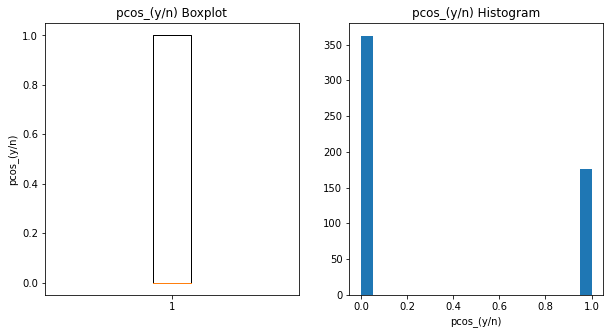

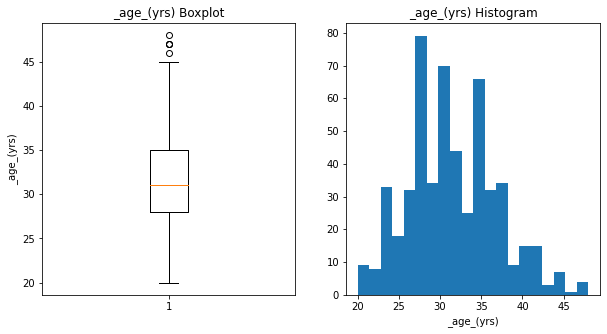

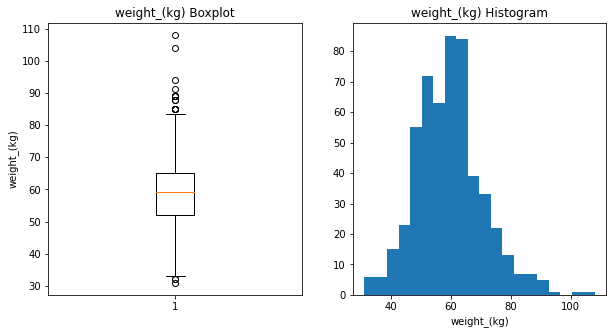

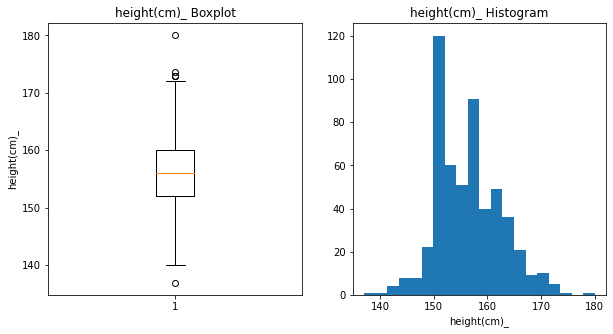

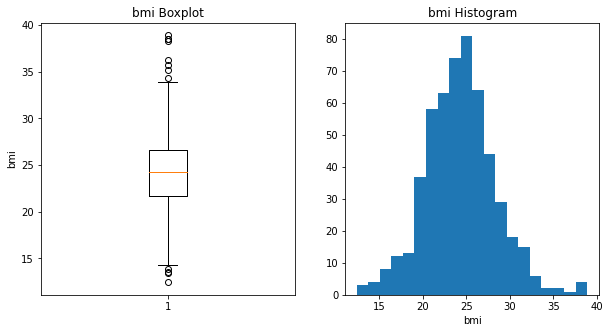

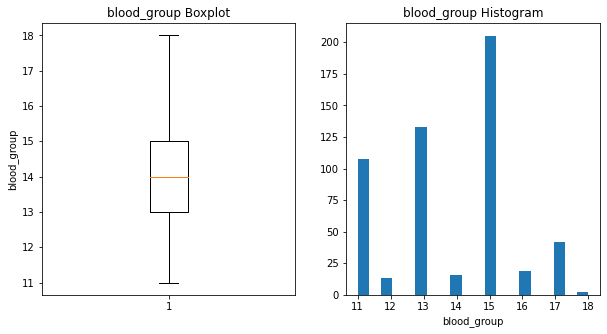

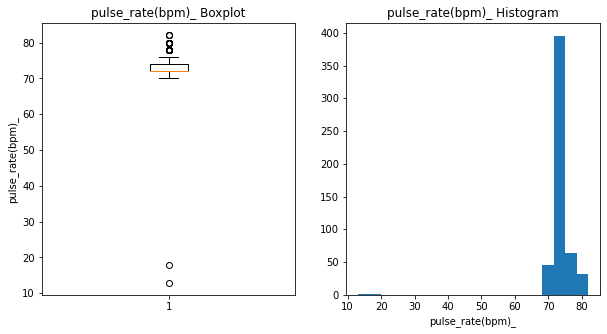

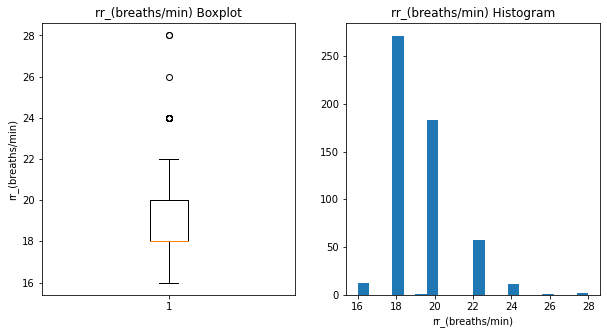

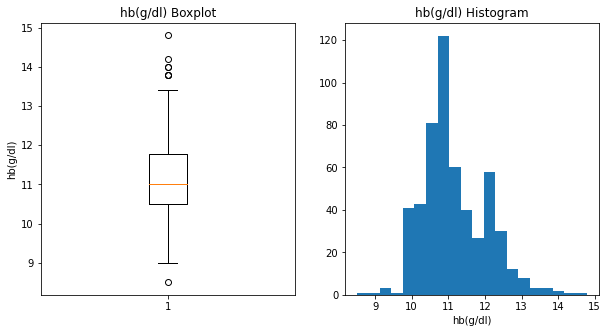

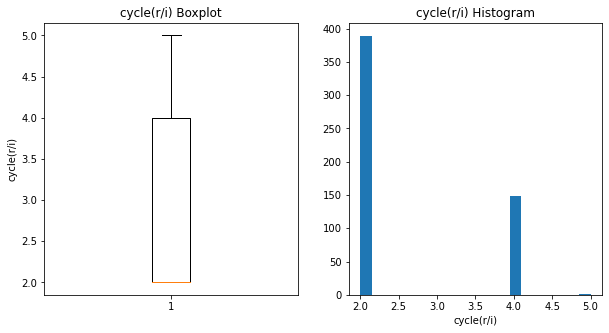

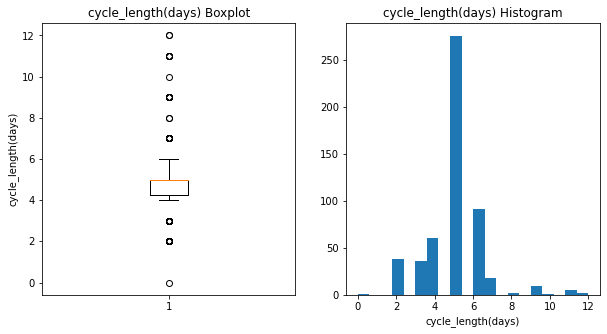

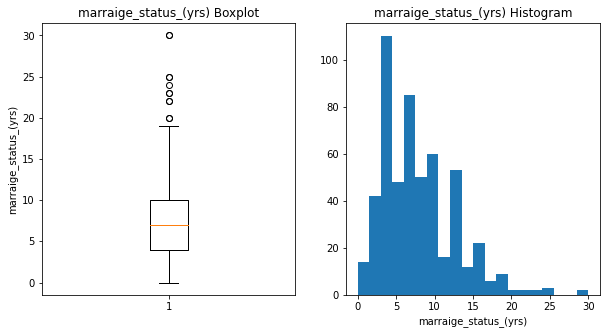

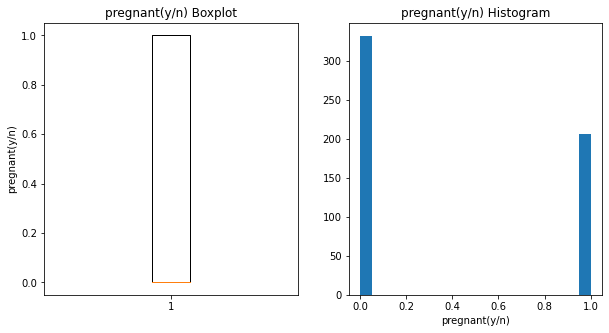

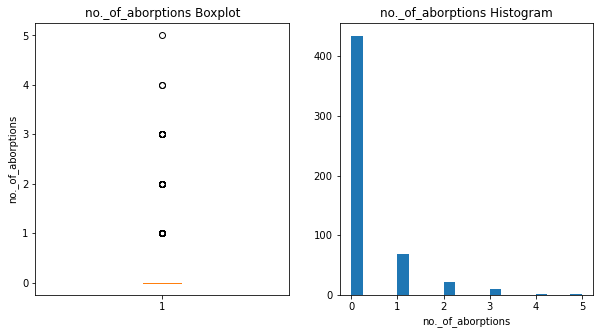

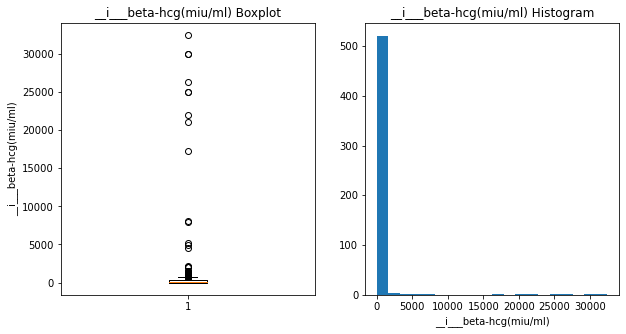

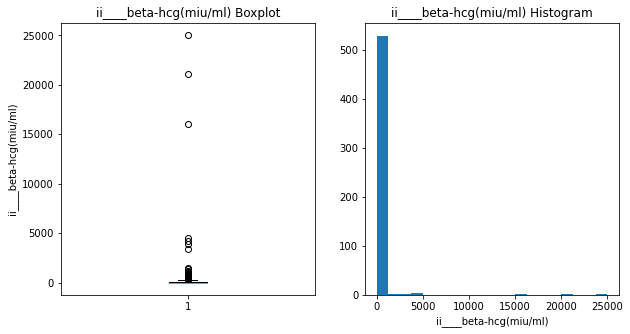

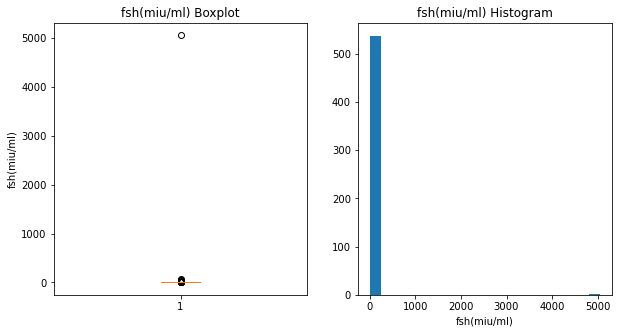

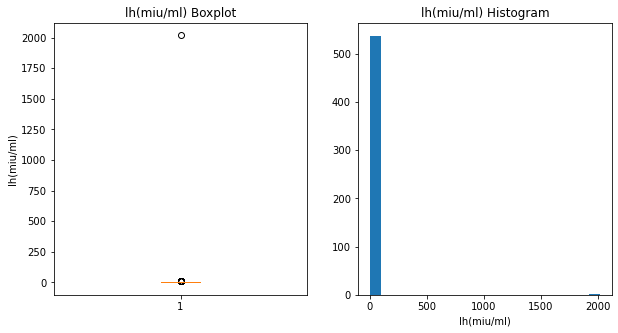

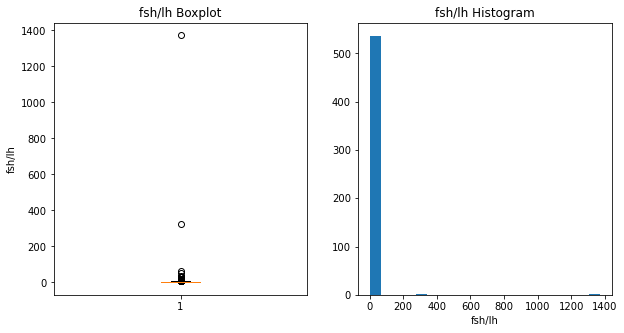

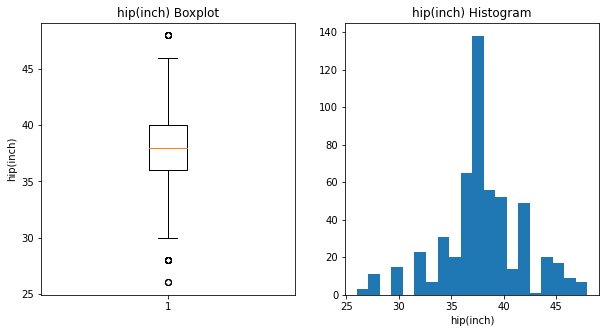

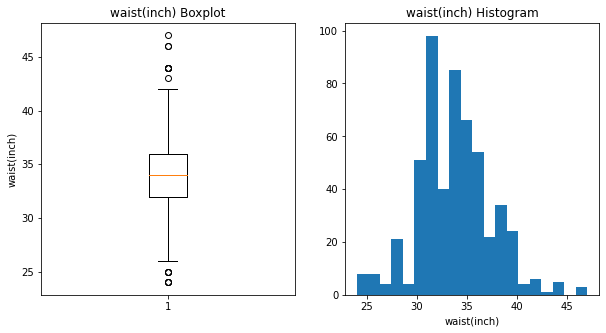

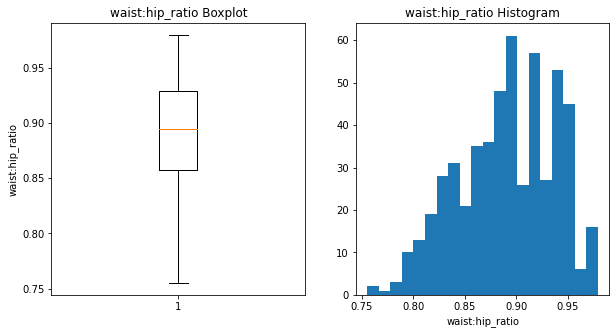

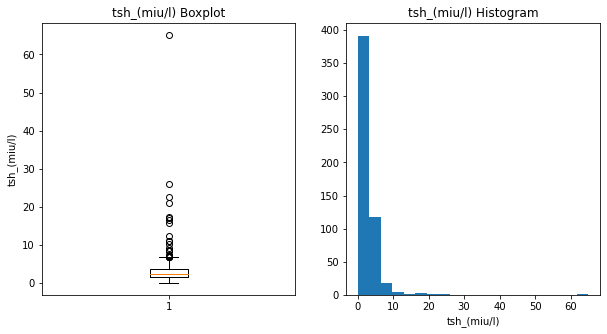

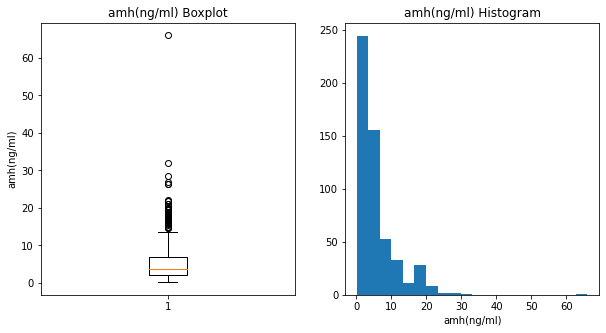

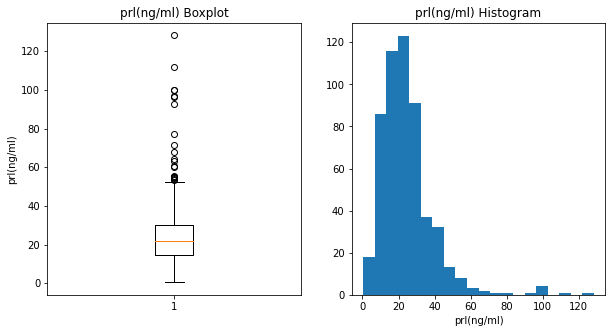

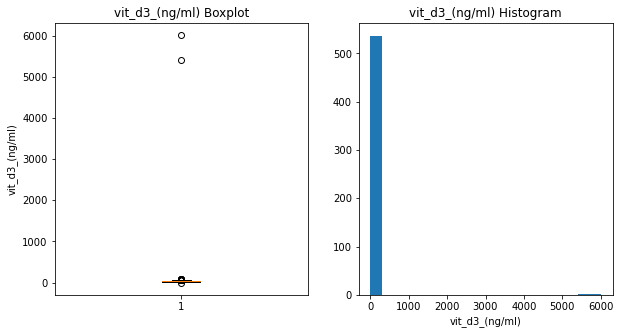

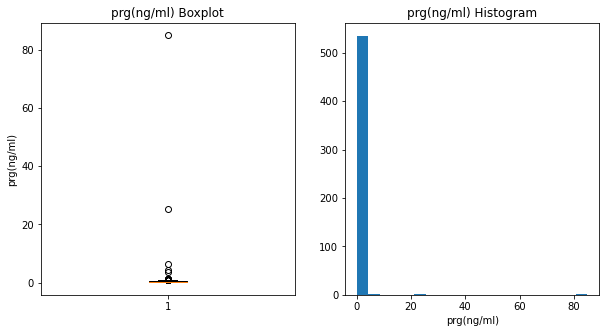

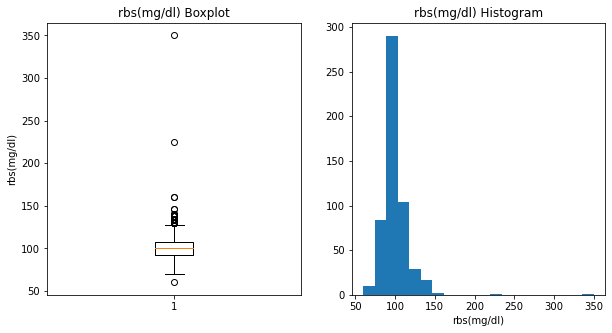

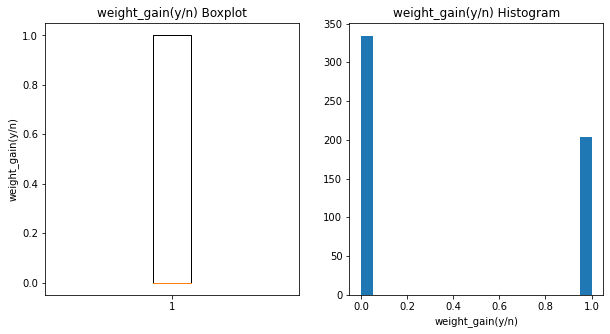

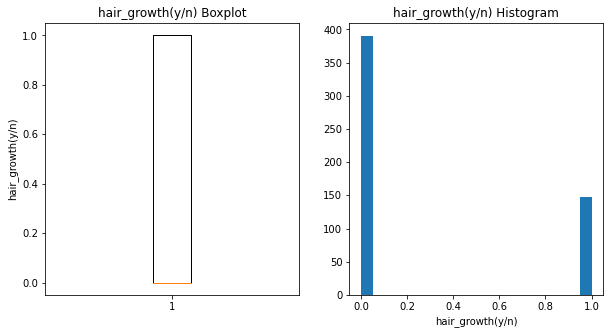

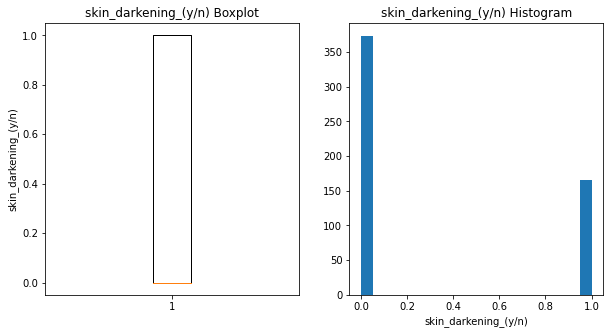

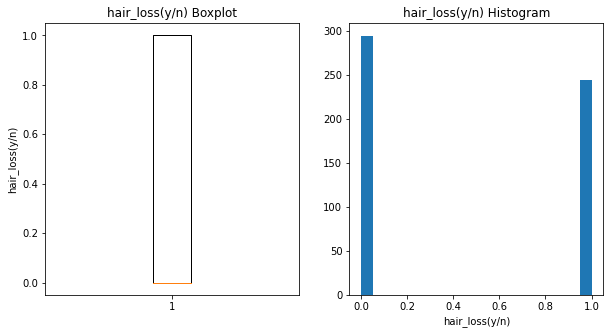

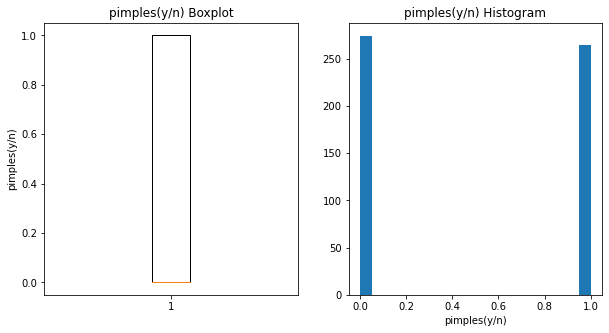

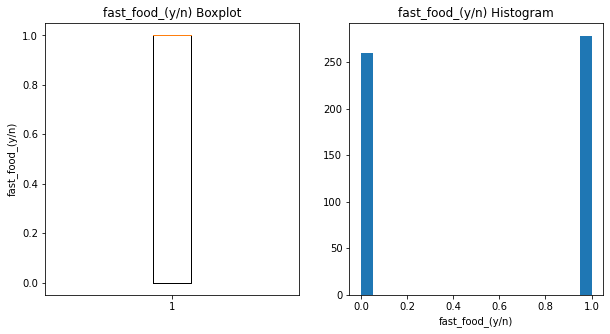

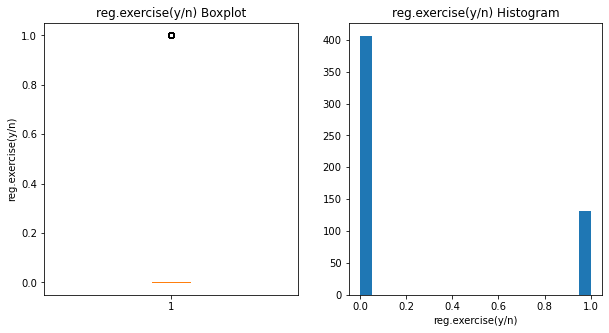

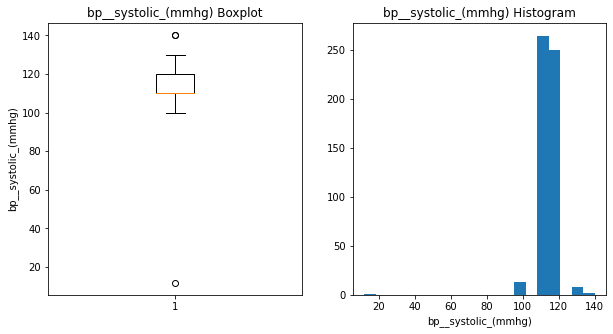

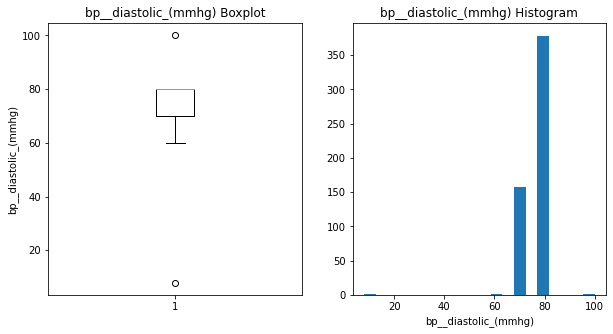

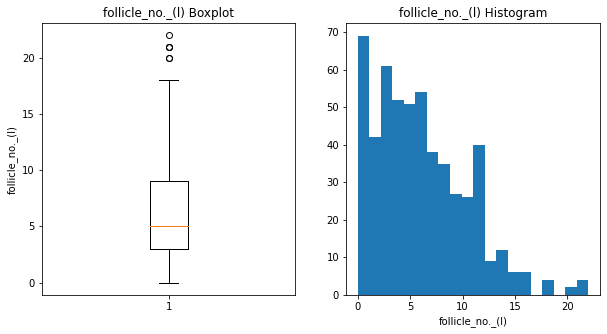

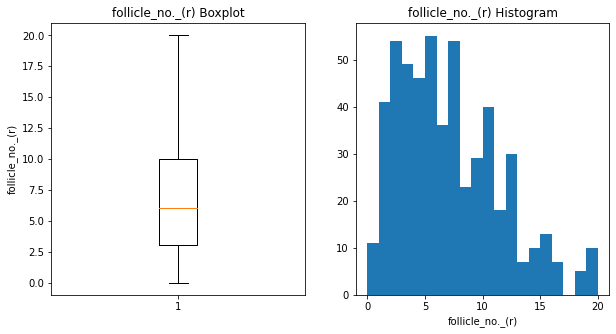

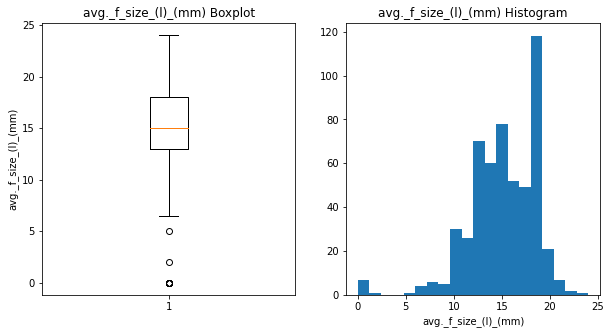

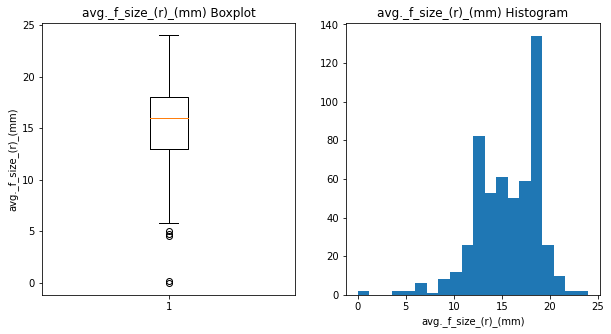

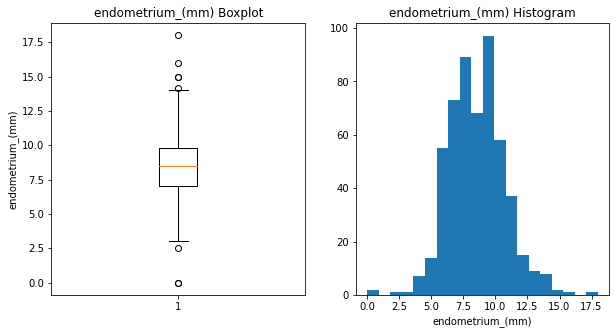

In [23]:
#call the plotting funtion to check for outliers
plotting (pcos_merged)

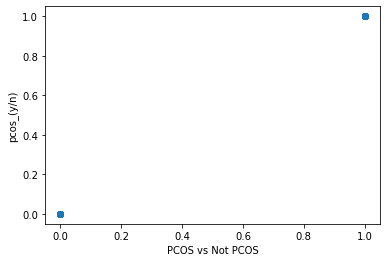

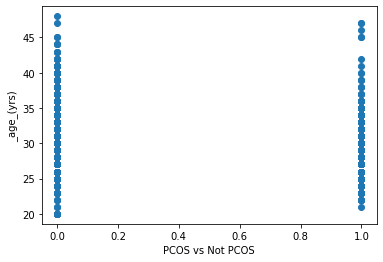

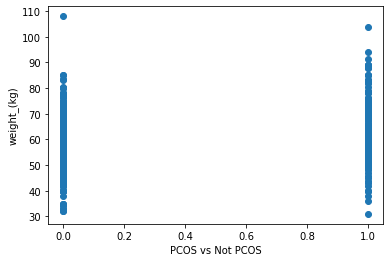

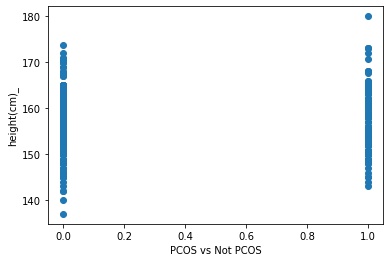

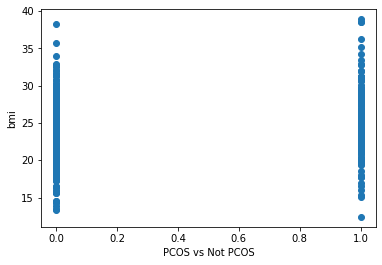

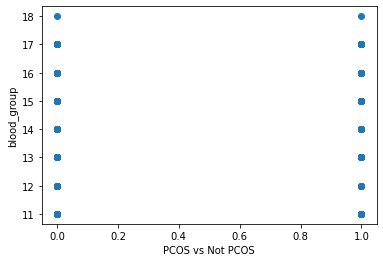

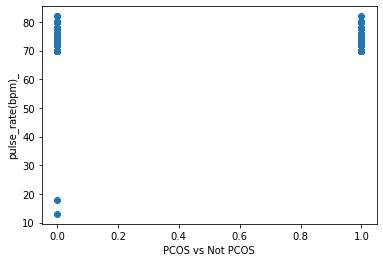

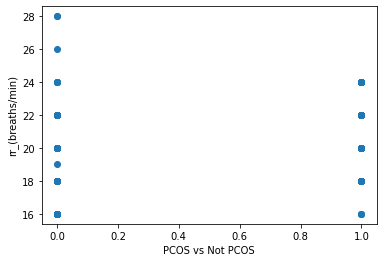

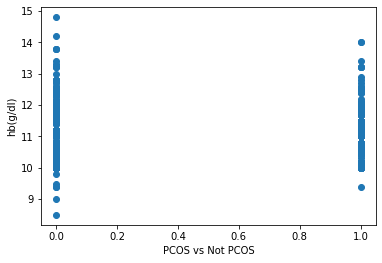

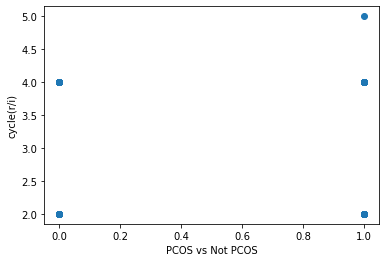

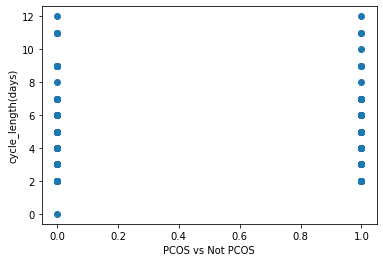

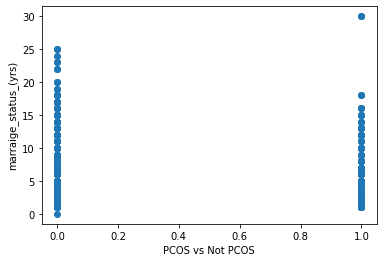

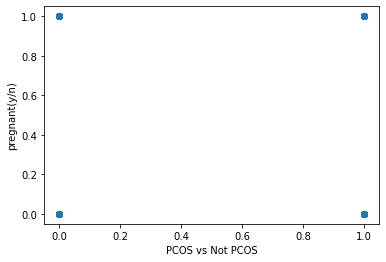

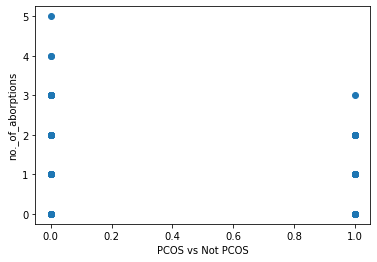

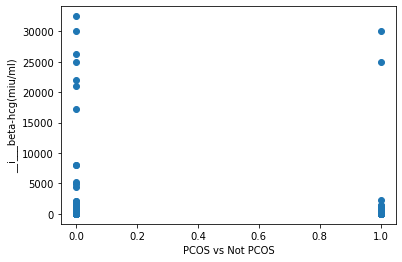

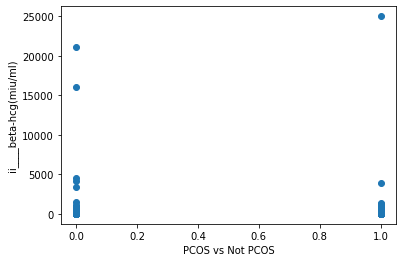

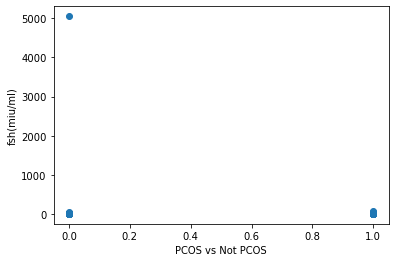

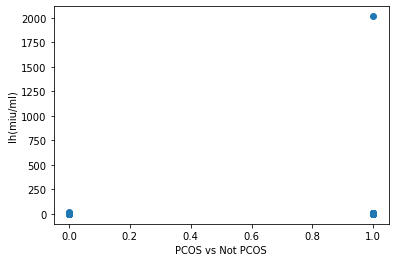

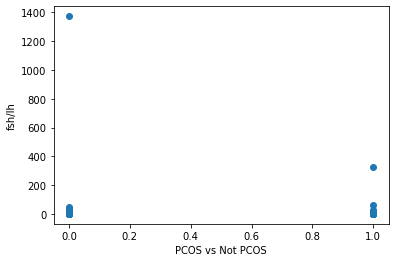

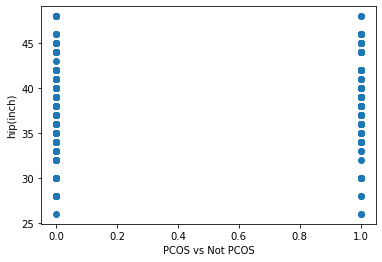

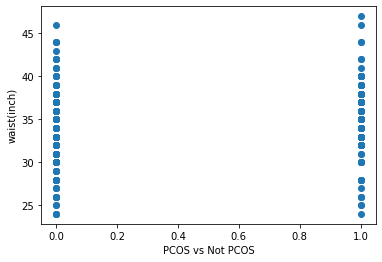

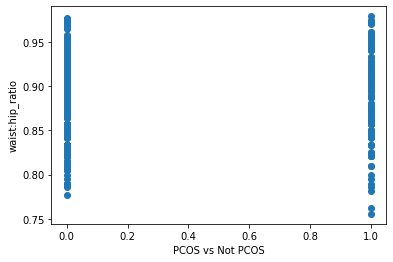

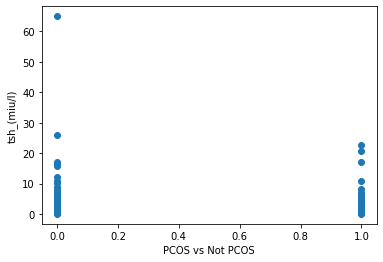

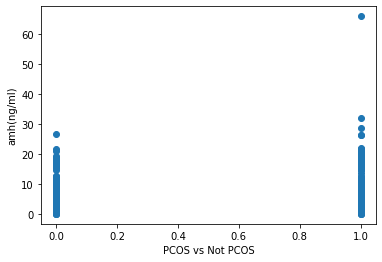

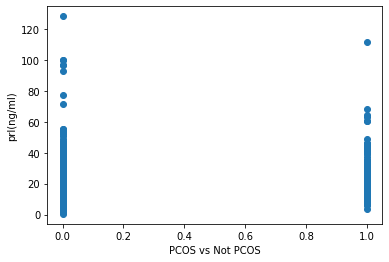

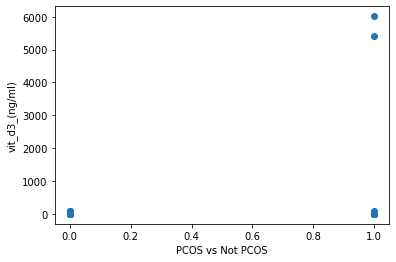

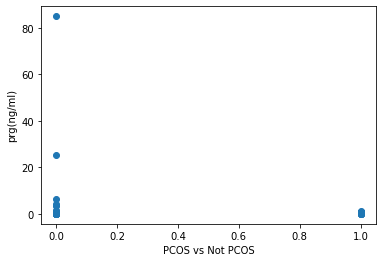

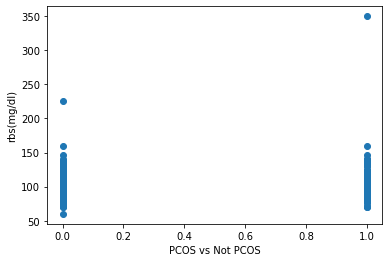

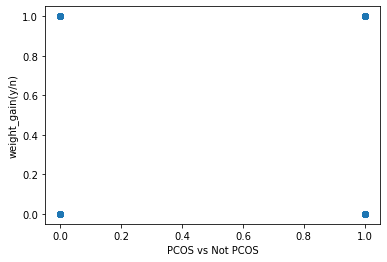

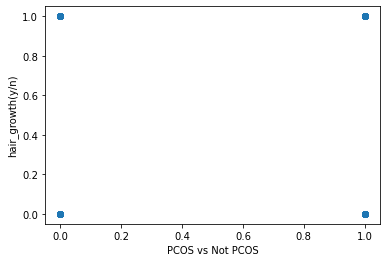

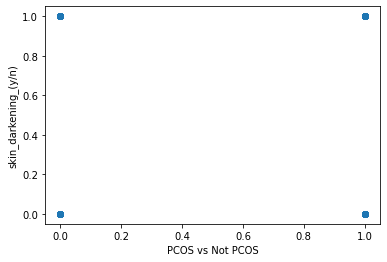

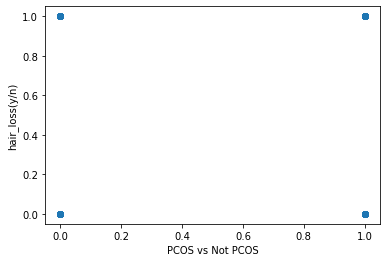

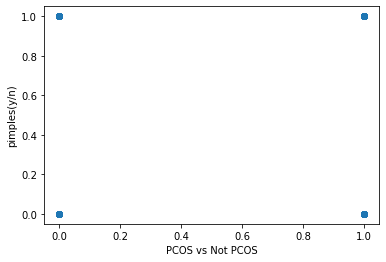

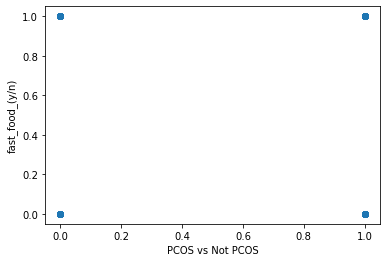

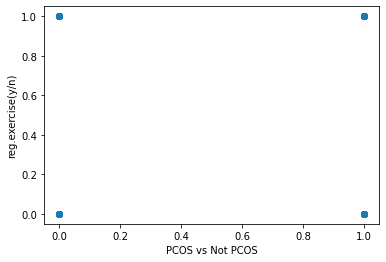

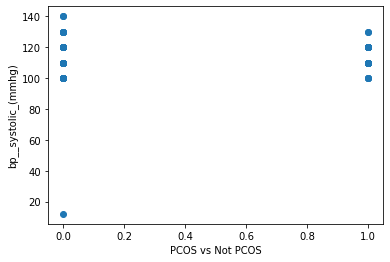

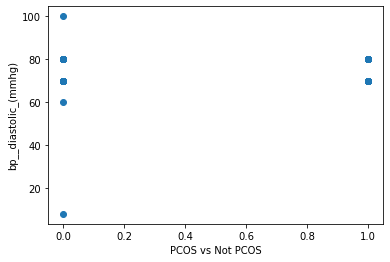

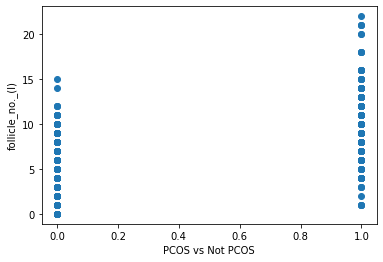

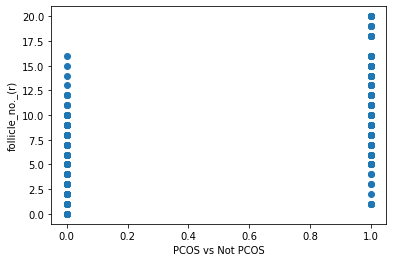

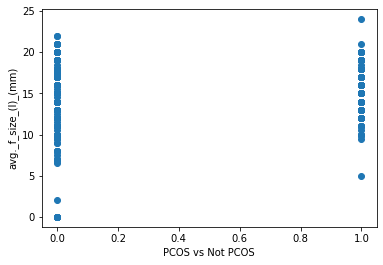

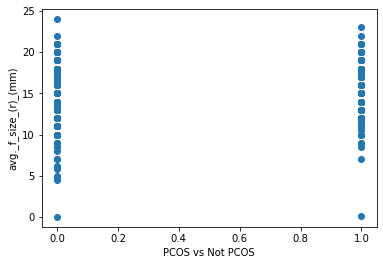

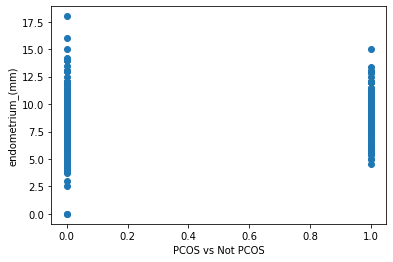

In [24]:
#scatterplot to check for raltionships between the target variables PCOS. 
for col in pcos_merged.columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(pcos_merged['pcos_(y/n)'], pcos_merged[col] )
 
    ax.set_xlabel('PCOS vs Not PCOS')

    ax.set_ylabel (col)
    plt.show()

In [25]:
# i dicided to treat the ouliers manually, since aplying a function would eliminate most os 
# my data, and some of these columns are probably going to be droped from the df since they dont 
# have inluence on the PCOS results
pcos_merged = pcos_merged[(pcos_merged["amh(ng/ml)"]<40)]
pcos_merged = pcos_merged[(pcos_merged["endometrium_(mm)"]>0)]
pcos_merged = pcos_merged[(pcos_merged["avg._f_size_(r)_(mm)"]>0)]
pcos_merged = pcos_merged[(pcos_merged["avg._f_size_(l)_(mm)"]>0)]
pcos_merged = pcos_merged[(pcos_merged["rbs(mg/dl)"]<200)]
pcos_merged = pcos_merged[(pcos_merged["prg(ng/ml)"]<20)]
pcos_merged = pcos_merged[(pcos_merged["fsh(miu/ml)"]<4000)]
pcos_merged = pcos_merged[(pcos_merged["lh(miu/ml)"]<1500)]
pcos_merged = pcos_merged[(pcos_merged["cycle(r/i)"]<4.5)]

In [26]:
pcos_merged.shape

(520, 42)

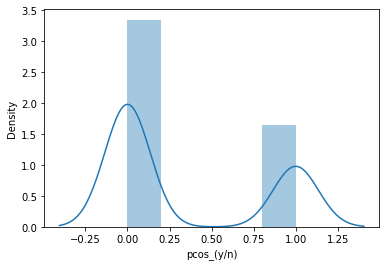

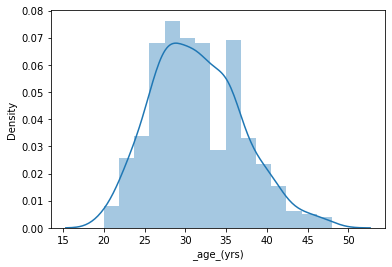

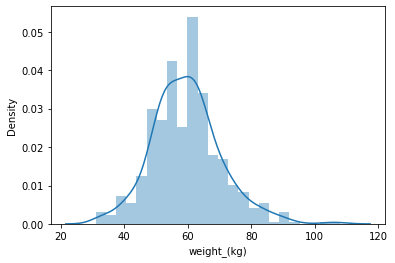

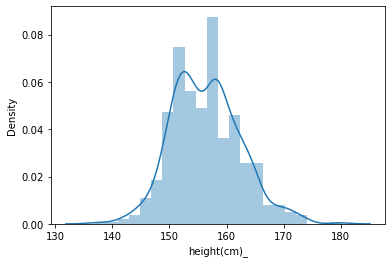

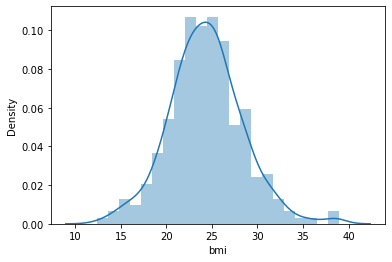

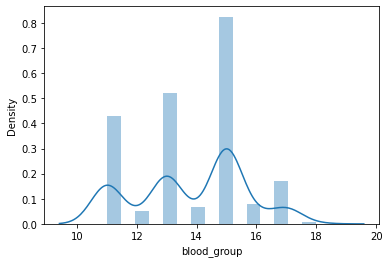

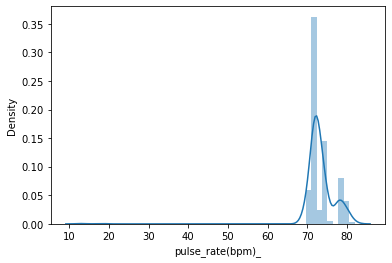

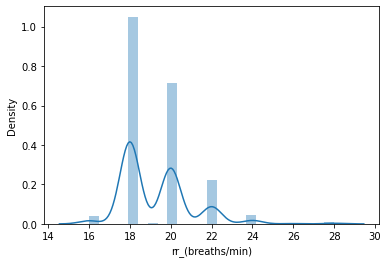

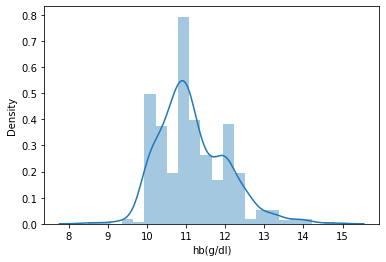

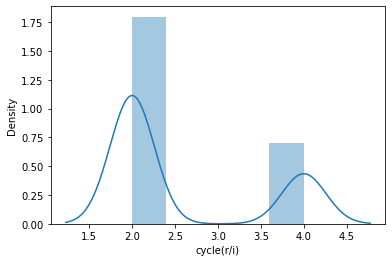

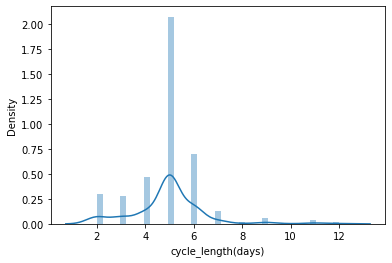

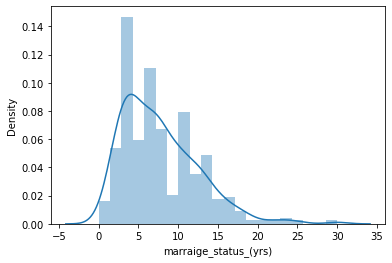

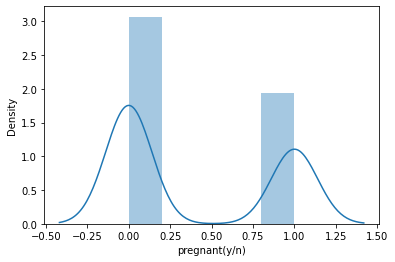

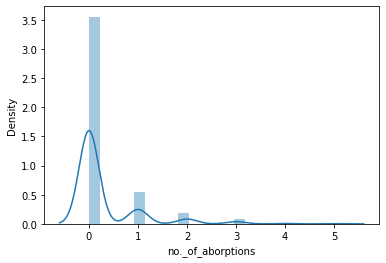

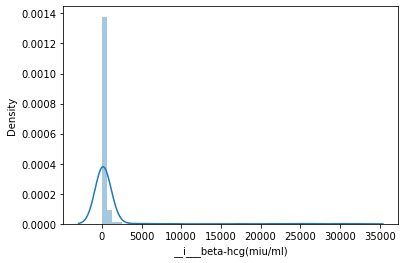

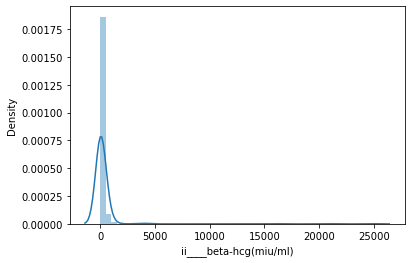

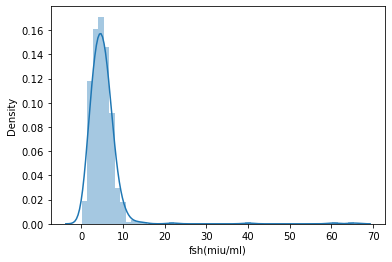

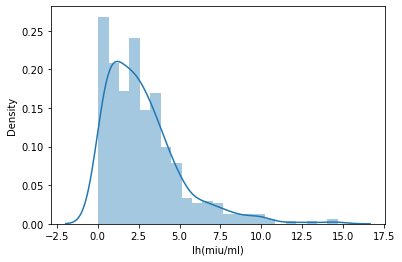

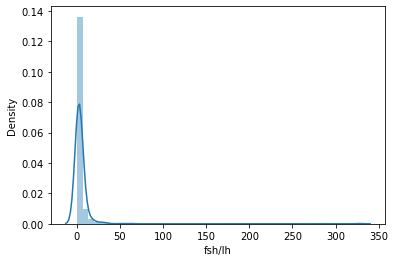

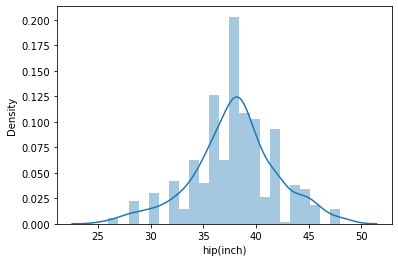

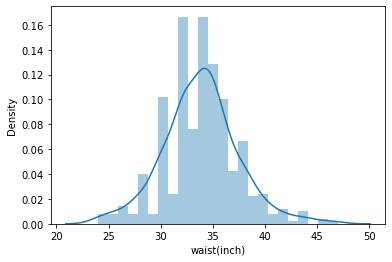

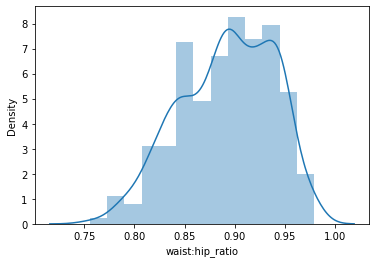

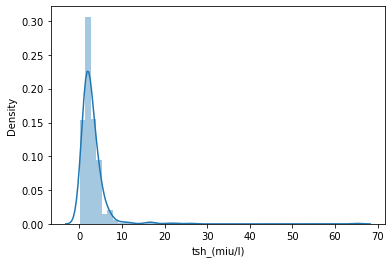

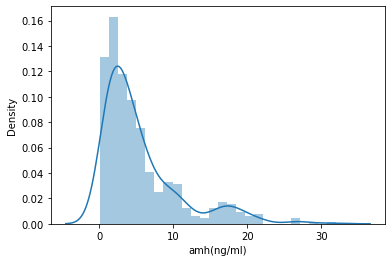

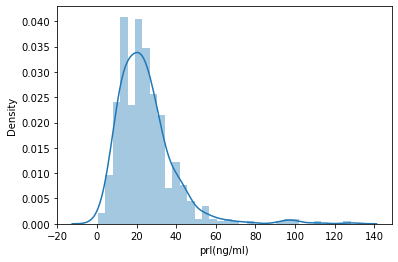

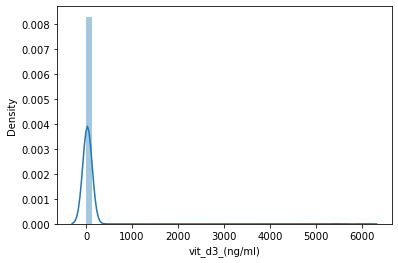

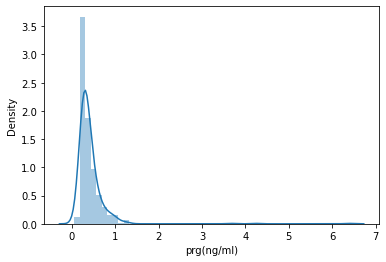

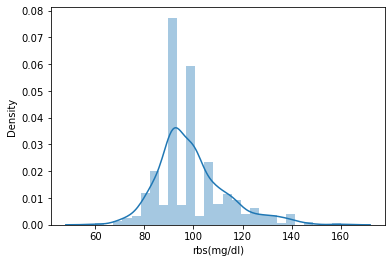

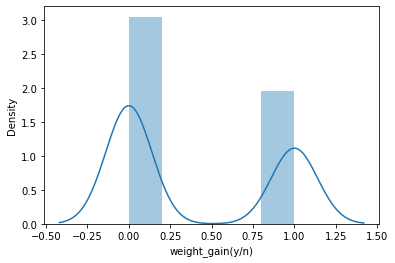

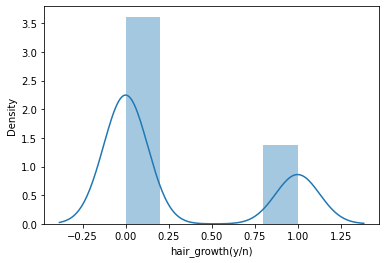

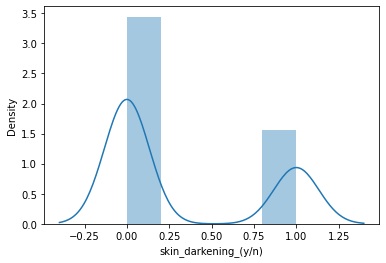

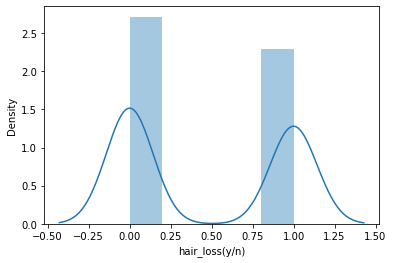

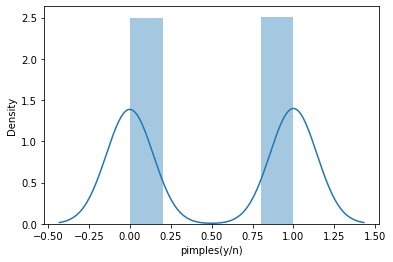

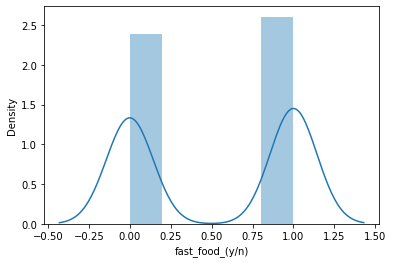

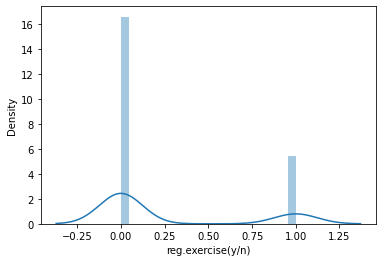

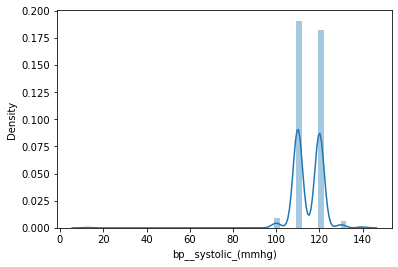

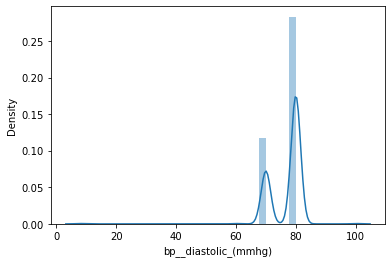

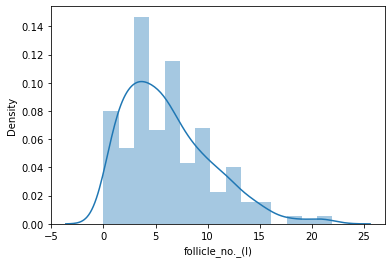

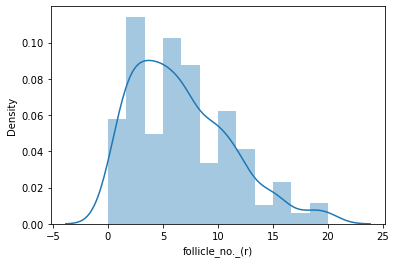

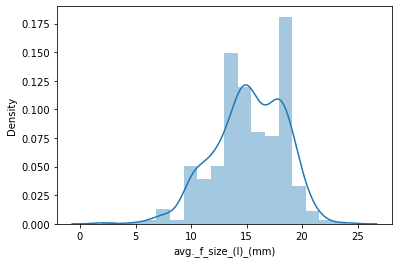

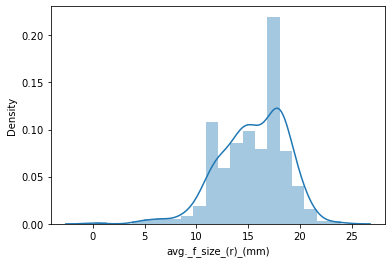

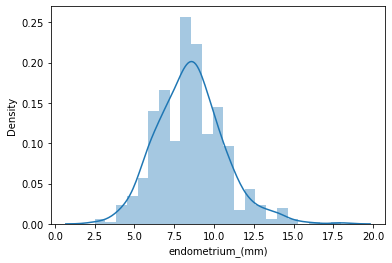

In [27]:
#do a plot of all the varibales
for col in pcos_merged.columns:
    sns.distplot(pcos_merged[col])
    plt.show()


In [28]:
pcos_merged.describe()

,pcos_(y/n),_age_(yrs),weight_(kg),height(cm)_,bmi,blood_group,pulse_rate(bpm)_,rr_(breaths/min),hb(g/dl),cycle(r/i),...,pimples(y/n),fast_food_(y/n),reg.exercise(y/n),bp__systolic_(mmhg),bp__diastolic_(mmhg),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm)
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.330769,31.423077,59.615769,156.403462,24.332875,13.821154,73.265385,19.251923,11.161500,2.561538,...,0.501923,0.521154,0.246154,114.676923,76.957692,6.200000,6.675000,15.218846,15.483788,8.523115
std,0.470943,5.433948,10.919104,6.015758,4.047893,1.846920,4.499492,1.687537,0.865943,0.899615,...,0.500478,0.500033,0.431184,7.440156,5.599179,4.216492,4.457047,3.150476,3.236950,2.117569
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,2.000000,0.170000,2.500000
25%,0.000000,27.000000,52.000000,152.000000,21.802152,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,60.000000,156.000000,24.300000,15.000000,72.000000,18.000000,11.000000,2.000000,...,1.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.675000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,4.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


# Correlation matrix

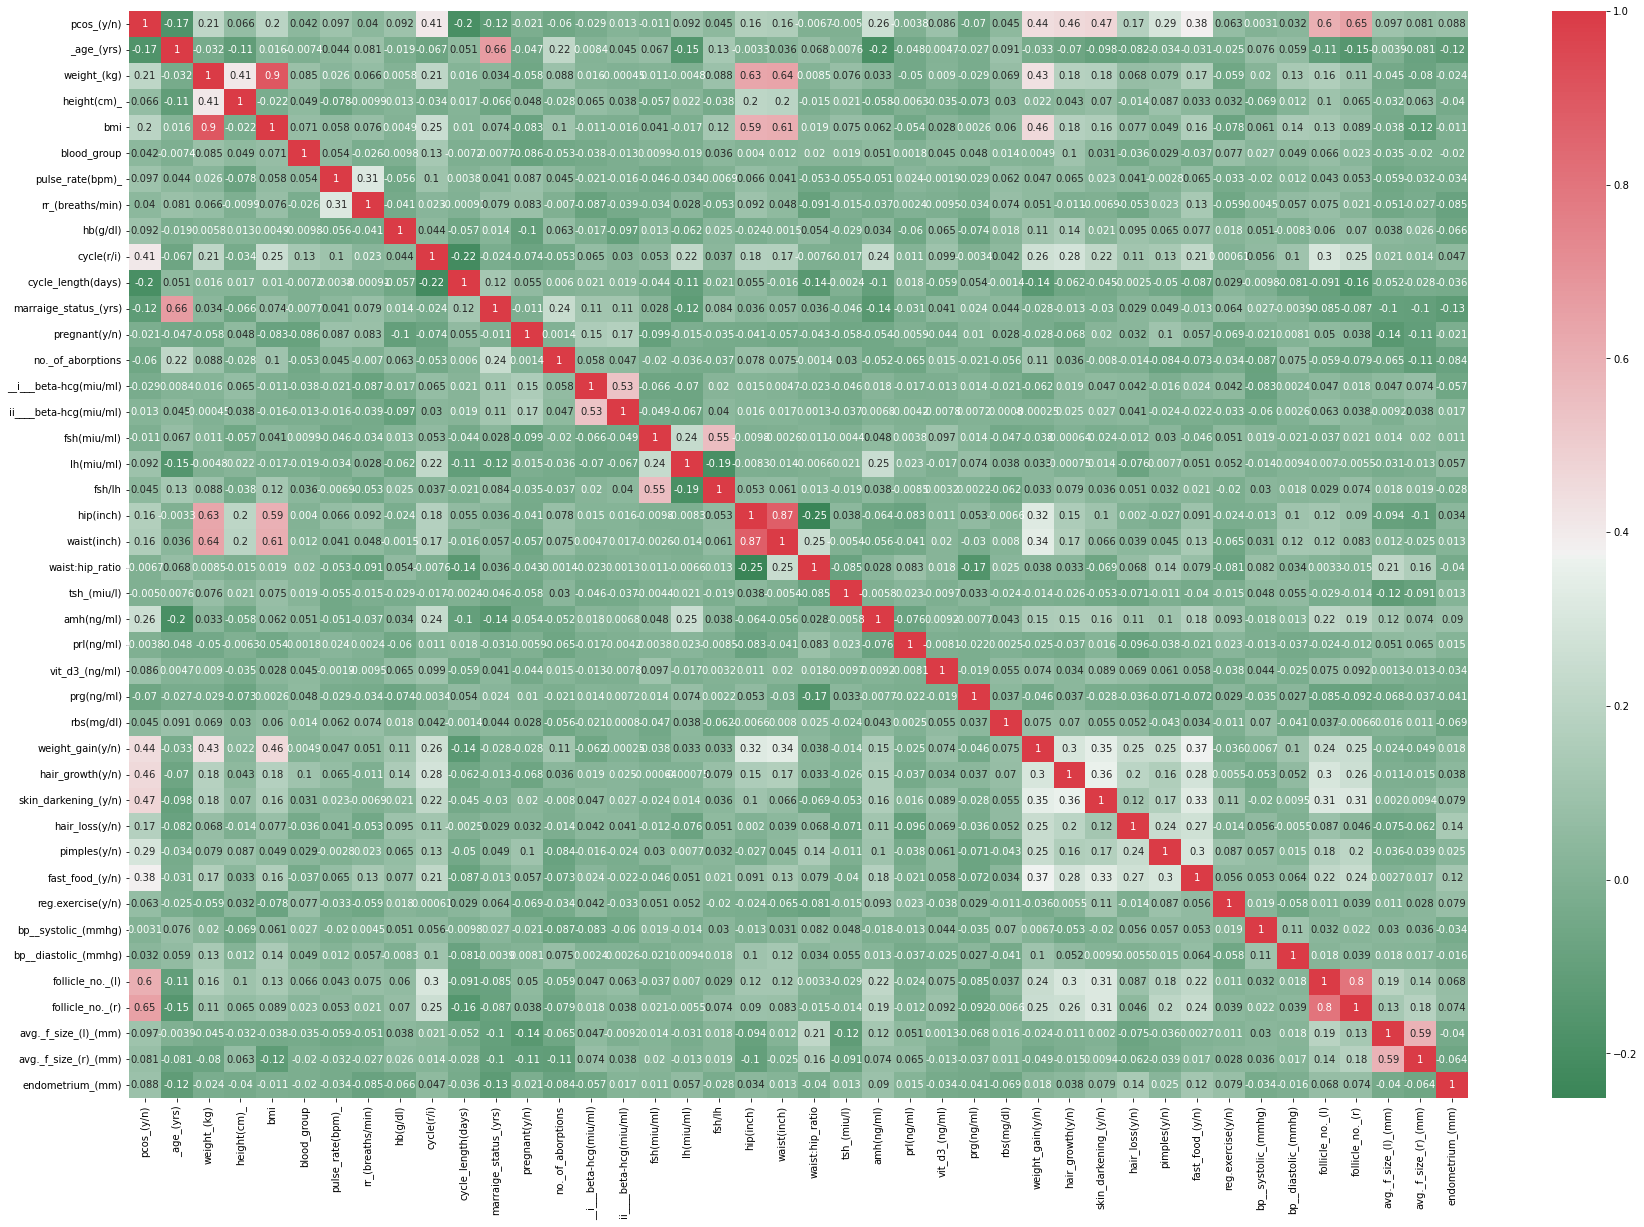

In [29]:
correlations_matrix = pcos_merged.corr()
cmap = sns.diverging_palette(500, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(correlations_matrix, cmap=cmap, annot=True)
plt.show()

In [30]:
pcos_merged.corr()["pcos_(y/n)"].sort_values(ascending=False)

pcos_(y/n)                1.000000
follicle_no._(r)          0.652567
follicle_no._(l)          0.600237
skin_darkening_(y/n)      0.471430
hair_growth(y/n)          0.460087
weight_gain(y/n)          0.442842
cycle(r/i)                0.406649
fast_food_(y/n)           0.379335
pimples(y/n)              0.291590
amh(ng/ml)                0.258548
weight_(kg)               0.208962
bmi                       0.196103
hair_loss(y/n)            0.174560
hip(inch)                 0.164584
waist(inch)               0.157921
avg._f_size_(l)_(mm)      0.097214
pulse_rate(bpm)_          0.096706
lh(miu/ml)                0.092218
hb(g/dl)                  0.091716
endometrium_(mm)          0.087957
vit_d3_(ng/ml)            0.086166
avg._f_size_(r)_(mm)      0.080840
height(cm)_               0.065870
reg.exercise(y/n)         0.063209
rbs(mg/dl)                0.044937
fsh/lh                    0.044621
blood_group               0.041561
rr_(breaths/min)          0.040413
bp__diastolic_(mmhg)

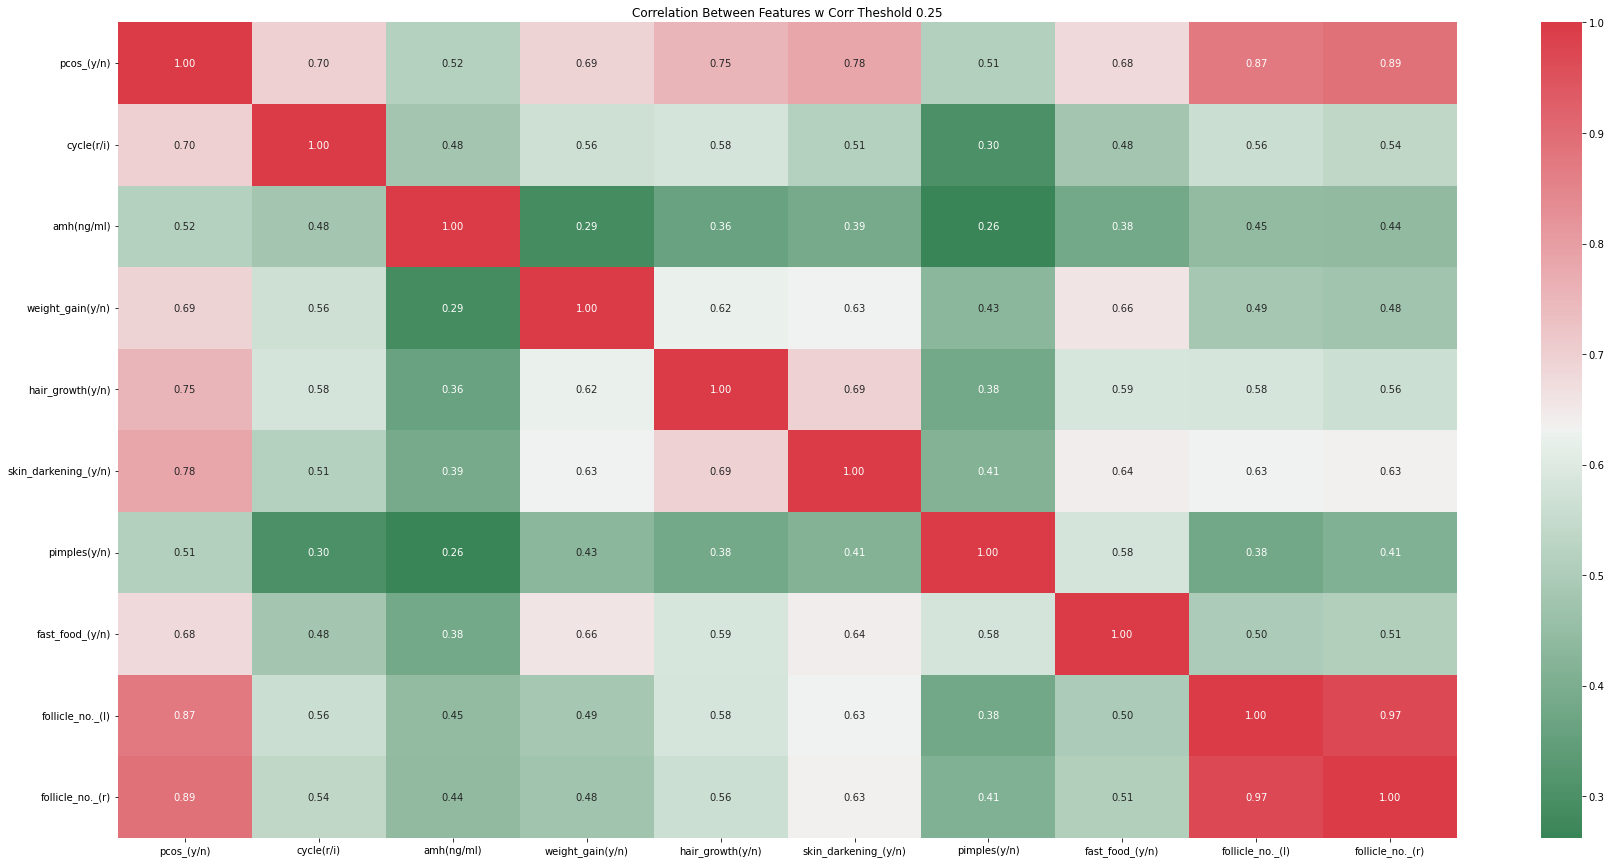

In [31]:
#do a correlation matrix establishing a treshhold
threshold = 0.25
filtre = np.abs(correlations_matrix["pcos_(y/n)"]) > threshold 
corr_features = correlations_matrix.columns[filtre].tolist()
cmap = sns.diverging_palette(500, 10, as_cmap=True)
plt.subplots(figsize=(30,15))
sns.heatmap(correlations_matrix[corr_features].corr(),cmap=cmap, annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.25")
plt.show()

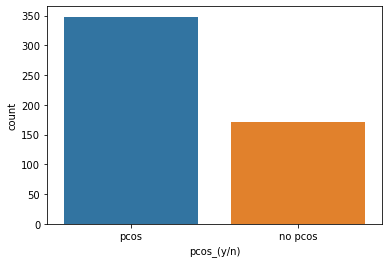

In [32]:
#check if there is imbalanced data
sns.countplot(x="pcos_(y/n)", data=pcos_merged)

plt.title('')
plt.xticks([0,1],['pcos',"no pcos"])
plt.show()


# Logistic Regression 

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

X=pcos_merged.drop(['pcos_(y/n)', 'hb(g/dl)', 'pulse_rate(bpm)_', 'vit_d3_(ng/ml)', 'height(cm)_', 'reg.exercise(y/n)', 'lh(miu/ml)', 
                    'rbs(mg/dl)', 'rr_(breaths/min)', 'bp__diastolic_(mmhg)', 'blood_group', 'waist:hip_ratio','bp__systolic_(mmhg)',
                    'prl(ng/ml)', 'tsh_(miu/l)', 'fsh/lh', 'ii____beta-hcg(miu/ml)', '__i___beta-hcg(miu/ml)', 'fsh(miu/ml)', 'pregnant(y/n)',
                    'prg(ng/ml)', 'no._of_aborptions', 'marraige_status_(yrs)', '_age_(yrs)', 'cycle_length(days)' 
                    ], axis=1)

Y= pcos_merged['pcos_(y/n)']


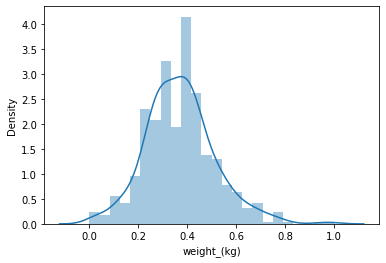

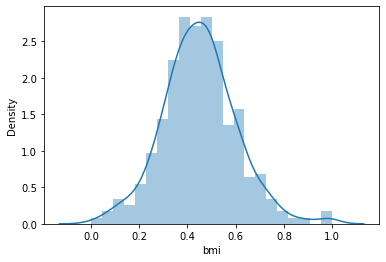

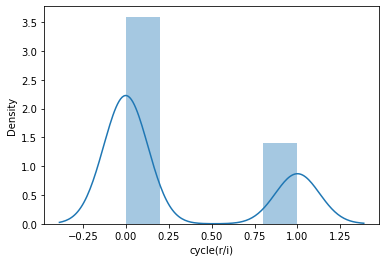

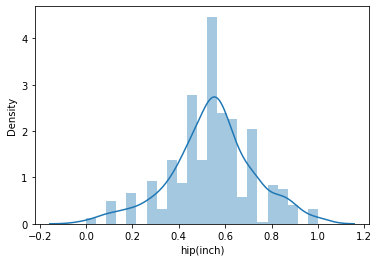

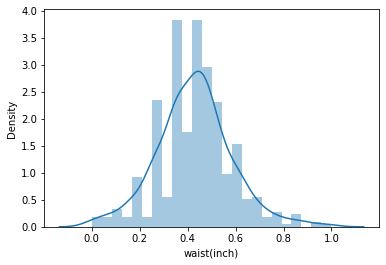

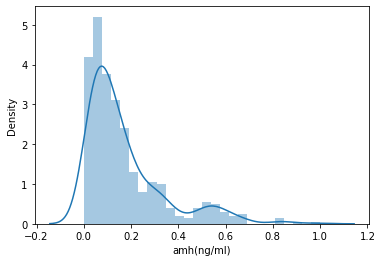

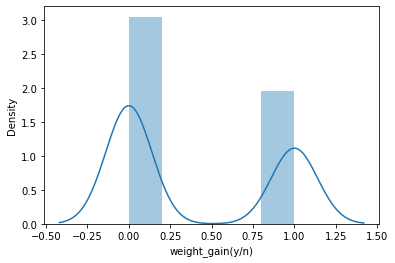

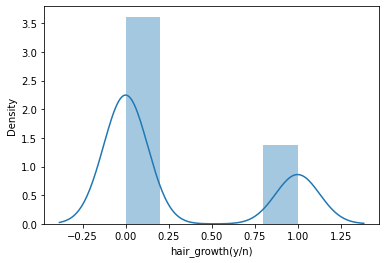

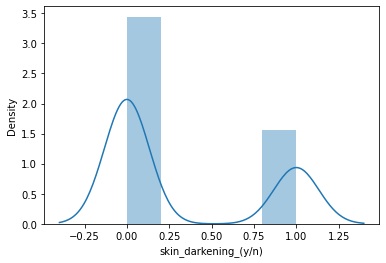

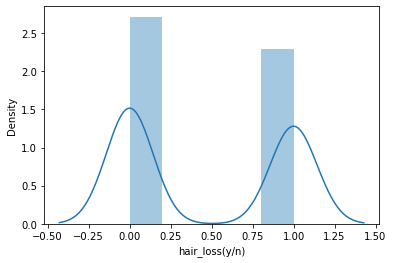

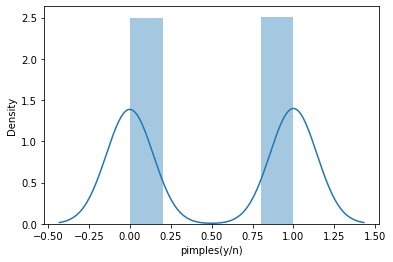

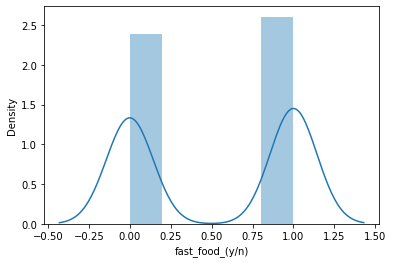

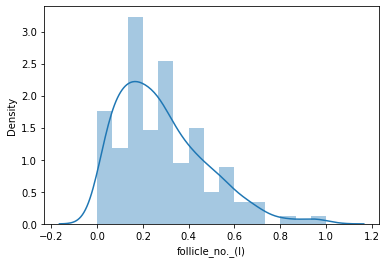

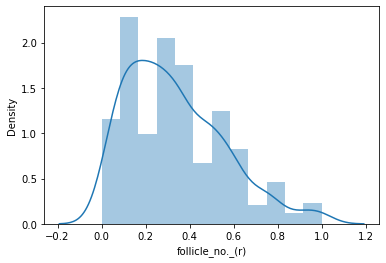

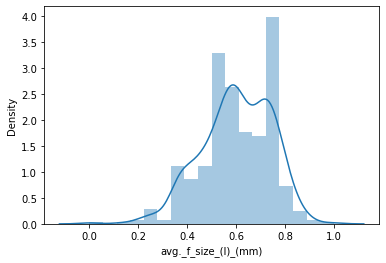

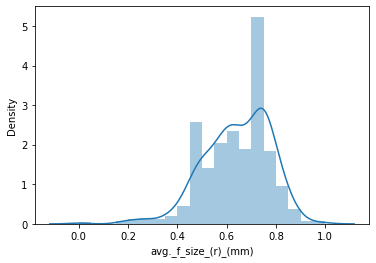

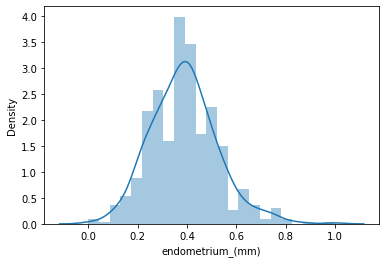

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)
normalized_data = pd.DataFrame(normalized_data, columns=X.columns)

#plot to check 
for col in normalized_data.columns:
    sns.distplot(normalized_data[col])
    plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

prediction = LR.predict(X_test)
prediction
print('Precision is:', precision_score(y_test, prediction))
print('Recall is:' , recall_score(y_test, prediction))
print('F1 is:' , f1_score(y_test, prediction))

print(classification_report(y_test, prediction))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)

Precision is: 0.7241379310344828
Recall is: 0.84
F1 is: 0.7777777777777777
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        79
           1       0.72      0.84      0.78        25

    accuracy                           0.88       104
   macro avg       0.84      0.87      0.85       104
weighted avg       0.89      0.88      0.89       104



array([[71,  8],
       [ 4, 21]], dtype=int64)

# SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state =0,sampling_strategy=1)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

train_smote = pd.concat([X_train_SMOTE,y_train_SMOTE], axis = 1)
train_smote
train_smote.sum() 

weight_(kg)             32247.530642
bmi                     13172.979168
cycle(r/i)               1426.000000
hip(inch)               20437.000000
waist(inch)             18165.000000
amh(ng/ml)               3230.534695
weight_gain(y/n)          231.000000
hair_growth(y/n)          153.000000
skin_darkening_(y/n)      192.000000
hair_loss(y/n)            248.000000
pimples(y/n)              285.000000
fast_food_(y/n)           307.000000
follicle_no._(l)         3783.000000
follicle_no._(r)         4090.000000
avg._f_size_(l)_(mm)     8254.255788
avg._f_size_(r)_(mm)     8372.649349
endometrium_(mm)         4627.272644
pcos_(y/n)                269.000000
dtype: float64

In [39]:
train_smote

,weight_(kg),bmi,cycle(r/i),hip(inch),waist(inch),amh(ng/ml),weight_gain(y/n),hair_growth(y/n),skin_darkening_(y/n),hair_loss(y/n),pimples(y/n),fast_food_(y/n),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm),pcos_(y/n)
0,69.000000,24.600000,2,40,38,0.910000,1,1,0,1,1,1,20,16,18.000000,14.000000,7.000000,1
1,50.000000,20.000000,2,36,30,0.890000,0,0,1,0,1,1,10,19,17.000000,18.000000,8.500000,1
2,61.000000,26.402355,2,36,34,0.370000,0,0,0,1,0,0,1,1,16.000000,12.000000,10.000000,0
3,56.000000,22.400000,2,38,35,1.500000,0,0,0,1,1,1,6,4,10.000000,11.000000,11.000000,0
4,55.000000,20.957171,4,35,32,13.600000,0,1,1,0,1,1,16,14,15.000000,18.000000,11.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,46.358786,19.591680,2,33,29,6.486247,0,0,0,0,0,0,11,13,15.679393,16.396964,9.212972,1
534,72.361091,29.026848,4,42,38,7.092606,1,0,1,1,1,1,9,10,16.638909,16.731516,8.000000,1
535,46.316978,17.997528,4,27,25,18.673158,0,0,0,0,1,0,7,8,17.536579,18.463421,9.234132,1
536,59.103329,23.878505,3,38,32,3.648162,1,0,1,1,1,1,13,14,15.586685,15.000000,7.051664,1


In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

print(classification_report(y_test, pred))

#check the results 
confusion_matrix(y_test,pred)

precision:  0.6571428571428571
recall:  0.92
f1:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        79
           1       0.66      0.92      0.77        25

    accuracy                           0.87       104
   macro avg       0.81      0.88      0.84       104
weighted avg       0.90      0.87      0.87       104



array([[67, 12],
       [ 2, 23]], dtype=int64)

In [41]:
# Example confusion matrix values
tn = 68
tp = 23
fp = 11
fn = 2

# Create a dictionary with confusion matrix values
confusion_matrix_dict = {
    'Predicted Negative': [tp, fn],
    'Predicted Positive': [fp, tn]
}

# Create a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix_dict, index=['Actual Negative','Actual Positive'])
confusion_matrix_df

,Predicted Negative,Predicted Positive
Actual Negative,23,11
Actual Positive,2,68


# KNN 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [43]:
#  fit the model
model = KNeighborsClassifier(n_neighbors = 100)
model = model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
pred = model.predict(X_test)


print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


print(classification_report(y_test, pred))

# to confirm is the number os false positives is low

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

precision:  0.5405405405405406
recall:  0.8
f1:  0.6451612903225806
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        79
           1       0.54      0.80      0.65        25

    accuracy                           0.79       104
   macro avg       0.73      0.79      0.75       104
weighted avg       0.83      0.79      0.80       104



array([[62, 17],
       [ 5, 20]], dtype=int64)

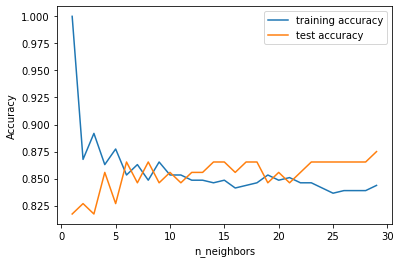

In [44]:
# let's see the test-training tradeoff as we force KNN to overfit
import matplotlib.pyplot as plt

# hyerparameter tuning
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  #training the model
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show() 

# Table for tableau with categorical variables.

In [45]:
pcos_merged=pcos_merged.drop(['hb(g/dl)', 'pulse_rate(bpm)_', 'height(cm)_', 'reg.exercise(y/n)', 
                    'rbs(mg/dl)', 'rr_(breaths/min)', 'bp__diastolic_(mmhg)', 'blood_group', 'waist:hip_ratio','bp__systolic_(mmhg)',
                    'ii____beta-hcg(miu/ml)','marraige_status_(yrs)'], axis=1)

In [46]:
# Making bins to understande the fsh values a little better 
pcos_merged['fsh/lh_bin'] = np.where(pcos_merged['fsh/lh'] < 2, 'Normal', np.where(pcos_merged['fsh/lh']>2,
            'High_Levels',
            'Other' 
        ))
pcos_merged

,pcos_(y/n),_age_(yrs),weight_(kg),bmi,cycle(r/i),cycle_length(days),pregnant(y/n),no._of_aborptions,__i___beta-hcg(miu/ml),fsh(miu/ml),...,skin_darkening_(y/n),hair_loss(y/n),pimples(y/n),fast_food_(y/n),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm),fsh/lh_bin
0,0,28,44.6,19.300000,2,5,0,0,1.99,7.95,...,0,0,0,1,3,3,18.0,18.0,8.5,High_Levels
1,0,36,65.0,24.921163,2,5,1,0,60.80,6.73,...,0,0,0,0,3,5,15.0,14.0,3.7,High_Levels
2,1,33,68.8,25.270891,2,5,1,0,494.08,5.54,...,0,1,1,1,13,15,18.0,20.0,10.0,High_Levels
3,0,37,65.0,29.674945,2,5,0,0,1.99,8.06,...,0,0,0,0,2,2,15.0,14.0,7.5,High_Levels
4,0,25,52.0,20.060954,2,5,1,0,801.45,3.98,...,0,1,0,0,3,4,16.0,14.0,7.0,High_Levels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,35,50.0,18.500000,2,5,0,1,1.99,10.06,...,0,0,0,0,1,0,17.5,10.0,6.7,High_Levels
535,0,30,63.2,25.300000,2,5,1,1,80.13,5.07,...,0,0,0,0,9,7,19.0,18.0,8.2,Normal
536,0,36,54.0,23.400000,2,6,0,0,1.99,11.96,...,0,0,0,0,1,0,18.0,9.0,7.3,High_Levels
537,0,27,50.0,22.200000,4,2,0,0,292.92,4.40,...,0,0,1,0,7,6,18.0,16.0,11.5,Normal


In [47]:
# Making bins to understande the fsh values a little better 
pcos_merged['fsh_bin'] = np.where(pcos_merged['fsh(miu/ml)'] <= 17.2, 'Normal', 
                                  np.where(pcos_merged['fsh(miu/ml)']>= 17.3,'High_level','Other' 
        ))
pcos_merged

,pcos_(y/n),_age_(yrs),weight_(kg),bmi,cycle(r/i),cycle_length(days),pregnant(y/n),no._of_aborptions,__i___beta-hcg(miu/ml),fsh(miu/ml),...,hair_loss(y/n),pimples(y/n),fast_food_(y/n),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm),fsh/lh_bin,fsh_bin
0,0,28,44.6,19.300000,2,5,0,0,1.99,7.95,...,0,0,1,3,3,18.0,18.0,8.5,High_Levels,Normal
1,0,36,65.0,24.921163,2,5,1,0,60.80,6.73,...,0,0,0,3,5,15.0,14.0,3.7,High_Levels,Normal
2,1,33,68.8,25.270891,2,5,1,0,494.08,5.54,...,1,1,1,13,15,18.0,20.0,10.0,High_Levels,Normal
3,0,37,65.0,29.674945,2,5,0,0,1.99,8.06,...,0,0,0,2,2,15.0,14.0,7.5,High_Levels,Normal
4,0,25,52.0,20.060954,2,5,1,0,801.45,3.98,...,1,0,0,3,4,16.0,14.0,7.0,High_Levels,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,35,50.0,18.500000,2,5,0,1,1.99,10.06,...,0,0,0,1,0,17.5,10.0,6.7,High_Levels,Normal
535,0,30,63.2,25.300000,2,5,1,1,80.13,5.07,...,0,0,0,9,7,19.0,18.0,8.2,Normal,Normal
536,0,36,54.0,23.400000,2,6,0,0,1.99,11.96,...,0,0,0,1,0,18.0,9.0,7.3,High_Levels,Normal
537,0,27,50.0,22.200000,4,2,0,0,292.92,4.40,...,0,1,0,7,6,18.0,16.0,11.5,Normal,Normal


In [48]:
pcos_merged['fsh/lh'].unique()

array([2.16032609e+00, 6.17431193e+00, 6.29545455e+00, 3.41525424e+00,
       4.42222222e+00, 3.02803738e+00, 9.19354839e+00, 1.58306189e+00,
       1.24503311e+00, 1.85430464e+00, 2.42079208e+00, 2.78231292e+00,
       1.32450331e+00, 6.81690141e+00, 2.00808625e+00, 3.78884462e+00,
       3.10769231e+00, 1.64189189e+00, 2.33333333e+00, 2.16923077e+00,
       1.45871560e+00, 1.77391304e+00, 3.79289941e+00, 6.00000000e+00,
       2.00911162e+00, 2.22302158e+00, 4.39024390e+00, 4.33962264e+00,
       2.02521008e+00, 1.55773956e+00, 7.73148148e-01, 6.66666667e+00,
       3.10152284e+00, 3.80701754e+00, 5.09615385e+00, 6.70833333e+00,
       2.60344828e+00, 2.00502513e+00, 1.60940695e+00, 1.41624365e+00,
       4.12658228e+00, 4.85964912e+00, 2.15185185e+01, 2.64028777e+00,
       4.82352941e+00, 9.41666667e-01, 8.06569343e-01, 2.95555556e+00,
       1.73105135e+00, 3.45833333e+00, 1.55098684e+00, 3.58163265e+00,
       3.50826446e+00, 6.36065574e+00, 2.05688623e+00, 2.16117216e+00,
      

In [49]:
# BMI
pcos_merged['bmi_bin'] = np.where(pcos_merged['bmi'] <= 25, 'Normal', np.where(pcos_merged['bmi']>=25,
            'High_bmi',
            'Other' 
        ))
pcos_merged

,pcos_(y/n),_age_(yrs),weight_(kg),bmi,cycle(r/i),cycle_length(days),pregnant(y/n),no._of_aborptions,__i___beta-hcg(miu/ml),fsh(miu/ml),...,pimples(y/n),fast_food_(y/n),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm),fsh/lh_bin,fsh_bin,bmi_bin
0,0,28,44.6,19.300000,2,5,0,0,1.99,7.95,...,0,1,3,3,18.0,18.0,8.5,High_Levels,Normal,Normal
1,0,36,65.0,24.921163,2,5,1,0,60.80,6.73,...,0,0,3,5,15.0,14.0,3.7,High_Levels,Normal,Normal
2,1,33,68.8,25.270891,2,5,1,0,494.08,5.54,...,1,1,13,15,18.0,20.0,10.0,High_Levels,Normal,High_bmi
3,0,37,65.0,29.674945,2,5,0,0,1.99,8.06,...,0,0,2,2,15.0,14.0,7.5,High_Levels,Normal,High_bmi
4,0,25,52.0,20.060954,2,5,1,0,801.45,3.98,...,0,0,3,4,16.0,14.0,7.0,High_Levels,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,35,50.0,18.500000,2,5,0,1,1.99,10.06,...,0,0,1,0,17.5,10.0,6.7,High_Levels,Normal,Normal
535,0,30,63.2,25.300000,2,5,1,1,80.13,5.07,...,0,0,9,7,19.0,18.0,8.2,Normal,Normal,High_bmi
536,0,36,54.0,23.400000,2,6,0,0,1.99,11.96,...,0,0,1,0,18.0,9.0,7.3,High_Levels,Normal,Normal
537,0,27,50.0,22.200000,4,2,0,0,292.92,4.40,...,1,0,7,6,18.0,16.0,11.5,Normal,Normal,Normal


In [50]:
pcos_merged.dtypes

pcos_(y/n)                  int64
_age_(yrs)                  int64
weight_(kg)               float64
bmi                       float64
cycle(r/i)                  int64
cycle_length(days)          int64
pregnant(y/n)               int64
no._of_aborptions           int64
__i___beta-hcg(miu/ml)    float64
fsh(miu/ml)               float64
lh(miu/ml)                float64
fsh/lh                    float64
hip(inch)                   int64
waist(inch)                 int64
tsh_(miu/l)               float64
amh(ng/ml)                float64
prl(ng/ml)                float64
vit_d3_(ng/ml)            float64
prg(ng/ml)                float64
weight_gain(y/n)            int64
hair_growth(y/n)            int64
skin_darkening_(y/n)        int64
hair_loss(y/n)              int64
pimples(y/n)                int64
fast_food_(y/n)             int64
follicle_no._(l)            int64
follicle_no._(r)            int64
avg._f_size_(l)_(mm)      float64
avg._f_size_(r)_(mm)      float64
endometrium_(m

In [51]:
pcos_merged["pregnant(y/n)"] = pcos_merged["pregnant(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["pimples(y/n)"] = pcos_merged["pimples(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["weight_gain(y/n)"] = pcos_merged["weight_gain(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["hair_growth(y/n)"] = pcos_merged["hair_growth(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["skin_darkening_(y/n)"] = pcos_merged["skin_darkening_(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["hair_loss(y/n)"] = pcos_merged["hair_loss(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["fast_food_(y/n)"] = pcos_merged["fast_food_(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["pcos_(y/n)"] = pcos_merged["pcos_(y/n)"].map({1 : "yes", 0 : "No"})
pcos_merged["_age_(yrs)"] = pcos_merged["_age_(yrs)"].astype(object)
pcos_merged["no._of_aborptions"] = pcos_merged["no._of_aborptions"].astype(object)
pcos_merged.dtypes

pcos_(y/n)                 object
_age_(yrs)                 object
weight_(kg)               float64
bmi                       float64
cycle(r/i)                  int64
cycle_length(days)          int64
pregnant(y/n)              object
no._of_aborptions          object
__i___beta-hcg(miu/ml)    float64
fsh(miu/ml)               float64
lh(miu/ml)                float64
fsh/lh                    float64
hip(inch)                   int64
waist(inch)                 int64
tsh_(miu/l)               float64
amh(ng/ml)                float64
prl(ng/ml)                float64
vit_d3_(ng/ml)            float64
prg(ng/ml)                float64
weight_gain(y/n)           object
hair_growth(y/n)           object
skin_darkening_(y/n)       object
hair_loss(y/n)             object
pimples(y/n)               object
fast_food_(y/n)            object
follicle_no._(l)            int64
follicle_no._(r)            int64
avg._f_size_(l)_(mm)      float64
avg._f_size_(r)_(mm)      float64
endometrium_(m

In [52]:
pcos_merged


,pcos_(y/n),_age_(yrs),weight_(kg),bmi,cycle(r/i),cycle_length(days),pregnant(y/n),no._of_aborptions,__i___beta-hcg(miu/ml),fsh(miu/ml),...,pimples(y/n),fast_food_(y/n),follicle_no._(l),follicle_no._(r),avg._f_size_(l)_(mm),avg._f_size_(r)_(mm),endometrium_(mm),fsh/lh_bin,fsh_bin,bmi_bin
0,No,28,44.6,19.300000,2,5,No,0,1.99,7.95,...,No,yes,3,3,18.0,18.0,8.5,High_Levels,Normal,Normal
1,No,36,65.0,24.921163,2,5,yes,0,60.80,6.73,...,No,No,3,5,15.0,14.0,3.7,High_Levels,Normal,Normal
2,yes,33,68.8,25.270891,2,5,yes,0,494.08,5.54,...,yes,yes,13,15,18.0,20.0,10.0,High_Levels,Normal,High_bmi
3,No,37,65.0,29.674945,2,5,No,0,1.99,8.06,...,No,No,2,2,15.0,14.0,7.5,High_Levels,Normal,High_bmi
4,No,25,52.0,20.060954,2,5,yes,0,801.45,3.98,...,No,No,3,4,16.0,14.0,7.0,High_Levels,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,No,35,50.0,18.500000,2,5,No,1,1.99,10.06,...,No,No,1,0,17.5,10.0,6.7,High_Levels,Normal,Normal
535,No,30,63.2,25.300000,2,5,yes,1,80.13,5.07,...,No,No,9,7,19.0,18.0,8.2,Normal,Normal,High_bmi
536,No,36,54.0,23.400000,2,6,No,0,1.99,11.96,...,No,No,1,0,18.0,9.0,7.3,High_Levels,Normal,Normal
537,No,27,50.0,22.200000,4,2,No,0,292.92,4.40,...,yes,No,7,6,18.0,16.0,11.5,Normal,Normal,Normal


In [53]:
pcos_merged['cycle(r/i)'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
534    False
535    False
536    False
537    False
538    False
Name: cycle(r/i), Length: 520, dtype: bool

In [54]:
pcos_merged.to_excel('pcos_merged.xlsx')

In [55]:
confusion_matrix_df.to_excel('confusion_matrix.xlsx')

In [56]:
pcos_merged.dtypes

pcos_(y/n)                 object
_age_(yrs)                 object
weight_(kg)               float64
bmi                       float64
cycle(r/i)                  int64
cycle_length(days)          int64
pregnant(y/n)              object
no._of_aborptions          object
__i___beta-hcg(miu/ml)    float64
fsh(miu/ml)               float64
lh(miu/ml)                float64
fsh/lh                    float64
hip(inch)                   int64
waist(inch)                 int64
tsh_(miu/l)               float64
amh(ng/ml)                float64
prl(ng/ml)                float64
vit_d3_(ng/ml)            float64
prg(ng/ml)                float64
weight_gain(y/n)           object
hair_growth(y/n)           object
skin_darkening_(y/n)       object
hair_loss(y/n)             object
pimples(y/n)               object
fast_food_(y/n)            object
follicle_no._(l)            int64
follicle_no._(r)            int64
avg._f_size_(l)_(mm)      float64
avg._f_size_(r)_(mm)      float64
endometrium_(m